# Emergency Department Patient Segmentation <br>Using Unsupervised Machine Learning Techniques  
### WGU - BS Data Analytics Capstone Project  
### Amanda Hanway - 2/1/2024
--- 

### Introduction  
Visits to the Emergency Department (ED) generate costly bills for both the patient and their healthcare payer. In many cases, steps can be taken to prevent a potential medical emergency, such as taking prescribed medications and regularly seeing a Primary Care Provider for checkups.  

This project will focus on identifying patterns among individuals who visited the ED. Armed with this insight, the healthcare payer can take pre-emptive action to prevent emergency encounters as a cost-savings measure.

**Data:**   
The data for this project was provided by Synthea, an open-source, synthetic patient generator. The datasets mimic Electronic Health Records (EHR) to provide realistic (but not real) medical history for synthetic patients, enabling Health IT research and development. Source: https://synthetichealth.github.io/synthea/  

**Table of Contents:**  
- [1. Setup](#1.-Setup)  
- [2. Exploratory Data Analysis for 2020 Dataset](#2.-Exploratory-Data-Analysis-for-2020-Dataset)
- [3. Data Cleaning & Feature Engineering for 2020 Dataset](#3.-Data-Cleaning-&-Feature-Engineering-for-2020-Dataset)
- [4. Principal Component Analysis for 2020 Dataset](#4.-Principal-Component-Analysis-for-2020-Dataset)
- [5. K-Means Clustering on 2020 Dataset](#5.-K-Means-Clustering-on-2020-Dataset)
- [6. Data Cleaning, Feature Engineering, PCA & Clustering for 2021 Dataset](#6.-Data-Cleaning,-Feature-Engineering,-PCA-&-Clustering-for-2021-Dataset)
- [7. Compare the 2020 and 2021 Dataset Clusters](#7.-Compare-the-2020-and-2021-Dataset-Clusters)
- [8. Analysis of Results for 2021 Dataset](#8.-Analysis-of-Results-for-2021-Dataset)
- [9. Conclusions, Limitations & Future Work](#9.-Conclusions,-Limitations-&-Future-Work)

---
### 1. Setup 

In [1]:
%matplotlib inline

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns
from datetime import datetime, date, time, timedelta
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# get the filenames from the folder
path = "data/2020/"
files = os.listdir(path)
print("Files:", files)   

Files: ['allergies.csv', 'careplans.csv', 'conditions.csv', 'devices.csv', 'encounters.csv', 'imaging_studies.csv', 'immunizations.csv', 'medications.csv', 'observations.csv', 'organizations.csv', 'patients.csv', 'payers.csv', 'payer_transitions.csv', 'procedures.csv', 'providers.csv', 'supplies.csv']


In [3]:
# read files into dataframes
care_df = pd.read_csv(path + "careplans.csv")
cond_df = pd.read_csv(path + "conditions.csv")
enct_df = pd.read_csv(path + "encounters.csv")
patn_df = pd.read_csv(path + "patients.csv")
algy_df = pd.read_csv(path + "allergies.csv")

---
### 2. Exploratory Data Analysis for 2020 Dataset

#### 2.1. Patient Dataset 
- 1,171 rows, 25 columns 
- Gender: 52% Female, 48% Male  
- Race: 82% White, 9% Black, 8% Asian, 1% Native, <1% Other   
- Healthcare Expenses: 
    - mean	764940.90
    - std	546474.87
    - min	1822.16
    - 25%	233551.56
    - 50%	718679.10
    - 75%	1260843.74
    - max	2145924.40

In [4]:
print(patn_df.info())
display(patn_df.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   1171 non-null   object 
 1   BIRTHDATE            1171 non-null   object 
 2   DEATHDATE            171 non-null    object 
 3   SSN                  1171 non-null   object 
 4   DRIVERS              958 non-null    object 
 5   PASSPORT             898 non-null    object 
 6   PREFIX               927 non-null    object 
 7   FIRST                1171 non-null   object 
 8   LAST                 1171 non-null   object 
 9   SUFFIX               12 non-null     object 
 10  MAIDEN               331 non-null    object 
 11  MARITAL              791 non-null    object 
 12  RACE                 1171 non-null   object 
 13  ETHNICITY            1171 non-null   object 
 14  GENDER               1171 non-null   object 
 15  BIRTHPLACE           1171 non-null   o

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,Marigot Saint Andrew Parish DM,427 Balistreri Way Unit 19,Chicopee,Massachusetts,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88
1,034e9e3b-2def-4559-bb2a-7850888ae060,1983-11-14,NaN,999-73-5361,S99962402,X88275464X,Mr.,Milo271,Feil794,NaN,...,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531,793946.01,3204.49


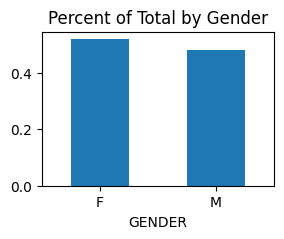

In [5]:
# Percent of total by gender
gender = patn_df['GENDER'].value_counts(normalize=True).reset_index(name='%')
gender.rename(columns={'index':'GENDER'}, inplace=True)
ax = gender.plot.bar(x='GENDER', y='%', rot=0, title ="Percent of Total by Gender", 
                      figsize=(3,2), legend=None)
plt.show()

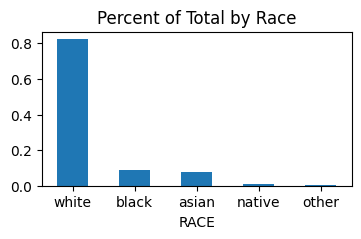

In [6]:
# Percent of total by race
race = patn_df['RACE'].value_counts(normalize=True).reset_index(name='%')
race.rename(columns={'index':'RACE'}, inplace=True)
ax = race.plot.bar(x='RACE', y='%', rot=0, title ="Percent of Total by Race", 
                      figsize=(4,2), legend=None)
plt.show()

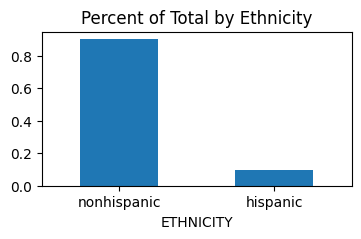

In [7]:
# Percent of total by ethnicity
eth = patn_df['ETHNICITY'].value_counts(normalize=True).reset_index(name='%')
eth.rename(columns={'index':'ETHNICITY'}, inplace=True)
ax = eth.plot.bar(x='ETHNICITY', y='%', rot=0, title ="Percent of Total by Ethnicity", 
                      figsize=(4,2), legend=None)
plt.show()

In [8]:
print("\nHealthcare Expenses Statistics:")
display(patn_df[['HEALTHCARE_EXPENSES']].describe().round(2))


Healthcare Expenses Statistics:


,HEALTHCARE_EXPENSES
count,1171.00
mean,764940.90
std,546474.87
min,1822.16
25%,233551.56
50%,718679.10
75%,1260843.74
max,2145924.40


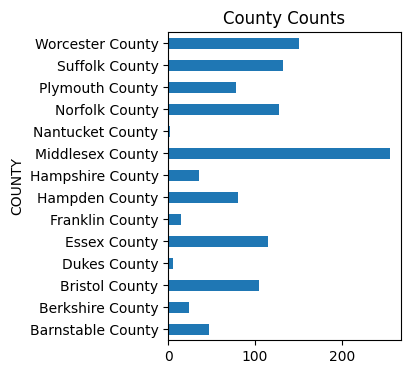

In [9]:
# find patient counts by county
counties = patn_df.groupby('COUNTY').size().reset_index(name='count')
ax = counties.plot.barh(x='COUNTY', y='count', rot=0, title ="County Counts", 
                      figsize=(3, 4), legend=None)
plt.show()

In [10]:
print("Missing zipcode:", patn_df['ZIP'].isna().sum())
print("Zipcode present:", patn_df['ZIP'].notna().sum())

Missing zipcode: 543
Zipcode present: 628


---
> Note: nearly half of zipcodes are missing so this column will not be used in the model
---

#### 2.2. Condition Dataset
- 8,376 rows, 6 columns
- 129 distinct conditions represented
- Top 5 conditions by row count:
    1. Viral sinusitis (disorder) 
    2. Acute viral pharyngitis (disorder) 
    3. Acute bronchitis (disorder) 
    4. Normal pregnancy 
    5. Body mass index 30+ - obesity (finding) 

In [11]:
print(cond_df.info())
display(cond_df.head(2))

print("\n# Unique Conditions:")
display(cond_df['DESCRIPTION'].nunique())

print("\nTop 5 Conditions:")
display(cond_df.groupby(['DESCRIPTION']).size().nlargest(5))

with pd.option_context('display.max_rows', None, 'display.max_colwidth', 700):
    print("\nCounts by Condition:")
    display(cond_df.groupby(['DESCRIPTION']).size().reset_index(name='Count'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8376 entries, 0 to 8375
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   START        8376 non-null   object
 1   STOP         4565 non-null   object
 2   PATIENT      8376 non-null   object
 3   ENCOUNTER    8376 non-null   object
 4   CODE         8376 non-null   int64 
 5   DESCRIPTION  8376 non-null   object
dtypes: int64(1), object(5)
memory usage: 392.8+ KB
None


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2001-05-01,NaN,1d604da9-9a81-4ba9-80c2-de3375d59b40,8f104aa7-4ca9-4473-885a-bba2437df588,40055000,Chronic sinusitis (disorder)
1,2011-08-09,2011-08-16,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,9d35ec9f-352a-4629-92ef-38eae38437e7,444814009,Viral sinusitis (disorder)



# Unique Conditions:


129


Top 5 Conditions:


DESCRIPTION
Viral sinusitis (disorder)                 1248
Acute viral pharyngitis (disorder)          653
Acute bronchitis (disorder)                 563
Normal pregnancy                            516
Body mass index 30+ - obesity (finding)     449
dtype: int64


Counts by Condition:


,DESCRIPTION,Count
0,Acute allergic reaction,19
1,Acute bacterial sinusitis (disorder),69
2,Acute bronchitis (disorder),563
3,Acute viral pharyngitis (disorder),653
4,Alcoholism,10
5,Alzheimer's disease (disorder),25
6,Anemia (disorder),300
7,Antepartum eclampsia,26
8,Appendicitis,50
9,Atopic dermatitis,20


#### 2.3. Encounter Dataset
- 53,346 rows, 15 columns
- Emergency encounters: 2,090
- Patients with emergency encounters: 853


In [12]:
print(enct_df.info())
display(enct_df.head(2))
print("\nRow Counts by Encounter Class & Description:")
with pd.option_context('display.max_rows', None, 'display.max_colwidth', 700):   
    display(enct_df.groupby(['ENCOUNTERCLASS']).size().reset_index(name='Count'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53346 entries, 0 to 53345
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   53346 non-null  object 
 1   START                53346 non-null  object 
 2   STOP                 53346 non-null  object 
 3   PATIENT              53346 non-null  object 
 4   ORGANIZATION         53346 non-null  object 
 5   PROVIDER             53346 non-null  object 
 6   PAYER                53346 non-null  object 
 7   ENCOUNTERCLASS       53346 non-null  object 
 8   CODE                 53346 non-null  int64  
 9   DESCRIPTION          53346 non-null  object 
 10  BASE_ENCOUNTER_COST  53346 non-null  float64
 11  TOTAL_CLAIM_COST     53346 non-null  float64
 12  PAYER_COVERAGE       53346 non-null  float64
 13  REASONCODE           13777 non-null  float64
 14  REASONDESCRIPTION    13777 non-null  object 
dtypes: float64(4), int64(1), object(10)


,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,d0c40d10-8d87-447e-836e-99d26ad52ea5,2010-01-23T17:45:28Z,2010-01-23T18:10:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e002090d-4e92-300e-b41e-7d1f21dee4c6,e6283e46-fd81-3611-9459-0edb1c3da357,6e2f1a2d-27bd-3701-8d08-dae202c58632,ambulatory,185345009,Encounter for symptom,129.16,129.16,54.16,10509002.0,Acute bronchitis (disorder)
1,e88bc3a9-007c-405e-aabc-792a38f4aa2b,2012-01-23T17:45:28Z,2012-01-23T18:00:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,772ee193-bb9f-30eb-9939-21e86c8e4da5,6f1d59a7-a5bd-3cf9-9671-5bad2f351c28,6e2f1a2d-27bd-3701-8d08-dae202c58632,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN



Row Counts by Encounter Class & Description:


,ENCOUNTERCLASS,Count
0,ambulatory,18936
1,emergency,2090
2,inpatient,1838
3,outpatient,9003
4,urgentcare,2373
5,wellness,19106


Patients with each Encounter Class:


,ENCOUNTERCLASS,nunique
2,inpatient,283
4,urgentcare,326
1,emergency,853
3,outpatient,864
0,ambulatory,1125
5,wellness,1171


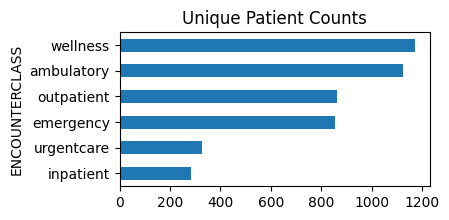

In [13]:
print('Patients with each Encounter Class:')
enct_u = enct_df[['ENCOUNTERCLASS','PATIENT']].groupby(['ENCOUNTERCLASS']).agg({'nunique'}).reset_index()

# check the results
enct_u = enct_u.droplevel(0, axis=1).rename(columns= {'':'ENCOUNTERCLASS'}).sort_values(by='nunique')
display(enct_u)

# creating the bar plot
ax = enct_u.plot.barh(x='ENCOUNTERCLASS', y='nunique', rot=0, title ="Unique Patient Counts", 
                      figsize=(4, 2), legend=None)
plt.show()

#### 2.4. Careplan Dataset
- 3,483 rows, 9 columns

In [14]:
print(care_df.info())
care_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3483 entries, 0 to 3482
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 3483 non-null   object 
 1   START              3483 non-null   object 
 2   STOP               1951 non-null   object 
 3   PATIENT            3483 non-null   object 
 4   ENCOUNTER          3483 non-null   object 
 5   CODE               3483 non-null   int64  
 6   DESCRIPTION        3483 non-null   object 
 7   REASONCODE         3156 non-null   float64
 8   REASONDESCRIPTION  3156 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 245.0+ KB
None


,Id,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
0,d2500b8c-e830-433a-8b9d-368d30741520,2010-01-23,2012-01-23,034e9e3b-2def-4559-bb2a-7850888ae060,d0c40d10-8d87-447e-836e-99d26ad52ea5,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)
1,07d9ddd8-dfa1-4e43-9bfe-39f63f4ace15,2011-05-13,2011-08-02,10339b10-3cd1-4ac3-ac13-ec26728cb592,e1ab4933-07a1-49f0-b4bd-05500919061d,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)


#### 2.5. Allergy dataset
- 597 rows, 6 columns
- Distinct allergies: 15
- Patients with allergies: 141

In [15]:
print(algy_df.info())
display(algy_df.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   START        597 non-null    object
 1   STOP         64 non-null     object
 2   PATIENT      597 non-null    object
 3   ENCOUNTER    597 non-null    object
 4   CODE         597 non-null    int64 
 5   DESCRIPTION  597 non-null    object
dtypes: int64(1), object(5)
memory usage: 28.1+ KB
None


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,1982-10-25,NaN,76982e06-f8b8-4509-9ca3-65a99c8650fe,b896bf40-8b72-42b7-b205-142ee3a56b55,300916003,Latex allergy
1,1982-10-25,NaN,76982e06-f8b8-4509-9ca3-65a99c8650fe,b896bf40-8b72-42b7-b205-142ee3a56b55,300913006,Shellfish allergy


Unique Allergies:
15
Patients with Allergies:
141


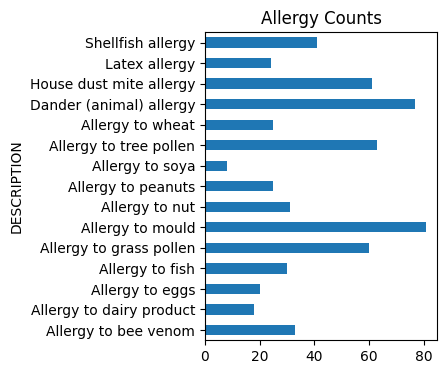

In [16]:
print("Unique Allergies:")
print(algy_df['DESCRIPTION'].nunique())

print('Patients with Allergies:')
print(algy_df['PATIENT'].nunique())

# find row counts by allergy
allergies = algy_df.groupby('DESCRIPTION').size().reset_index(name='count')
ax = allergies.plot.barh(x='DESCRIPTION', y='count', rot=0, title ="Allergy Counts", 
                      figsize=(3, 4), legend=None)
plt.show()

---
### 3. Data Cleaning & Feature Engineering for 2020 Dataset

Steps Identified Through EDA:
- 3.1. Remove patients who did not have an emergency encounter  
- 3.2. Summarize counts of each encounter class per patient   
- 3.3. Summarize conditions per patient  
- 3.4. Create a column for patient age
- 3.5. Identify and remove outliers for patient age
- 3.6. Create patient age numerical categories  
- 3.7. Create healthcare expense numerical categories  
- 3.8. Create gender numerical categories  
- 3.9. Create race numerical categories  
- 3.10. Create county numerical categories  
- 3.11. Create a careplan indicator  
- 3.12. Create allergy one-hot encoded columns 
- 3.13. Join datasets together into one main dataset  
- 3.14. Assess and handle missing data  
- 3.15. Identify and remove outliers for emergency encounters
- 3.16. Create a reusable cleaning function from all steps


#### 3.1. Remove patients who did not have an ED encounter

In [17]:
# identify patients with emergency encounters
ed_patients = enct_df[enct_df['ENCOUNTERCLASS'] == 'emergency']
ed_patients = ed_patients[['ENCOUNTERCLASS','PATIENT']].drop_duplicates()

# show original df counts
print("Original row counts:")
print("Patn:", patn_df.shape[0])
print("Enct:", enct_df.shape[0])
print("Cond:", cond_df.shape[0])
print("Care:", care_df.shape[0])
print("Algy:", algy_df.shape[0])

# filter the dataframes
patn_df_ed = patn_df[patn_df['Id'].isin(ed_patients['PATIENT'])].reset_index()
enct_df_ed = enct_df[enct_df['PATIENT'].isin(ed_patients['PATIENT'])].reset_index()
cond_df_ed = cond_df[cond_df['PATIENT'].isin(ed_patients['PATIENT'])].reset_index()
care_df_ed = care_df[care_df['PATIENT'].isin(ed_patients['PATIENT'])].reset_index()
algy_df_ed = algy_df[algy_df['PATIENT'].isin(ed_patients['PATIENT'])].reset_index()

# show new df counts
print("\nNew row counts:")
print("Patn:", patn_df_ed.shape[0])
print("Enct:", enct_df_ed.shape[0])
print("Cond:", cond_df_ed.shape[0])
print("Care:", care_df_ed.shape[0])
print("Algy:", algy_df_ed.shape[0])

Original row counts:
Patn: 1171
Enct: 53346
Cond: 8376
Care: 3483
Algy: 597

New row counts:
Patn: 853
Enct: 45630
Cond: 6958
Care: 2979
Algy: 470


#### 3.2. Summarize encounters per patient 

In [18]:
# find count of each encounter class by patient
enct_df_summ = enct_df_ed.groupby(['PATIENT','ENCOUNTERCLASS']).size().reset_index(name='Count')
display(enct_df_summ.head(2))

# pivot the data
enct_df_pvt = enct_df_summ.pivot(index='PATIENT', columns='ENCOUNTERCLASS', values='Count').reset_index()

# fill na with 0
enct_df_pvt.fillna(value=0, inplace=True)

# rename columns
enct_df_pvt.rename(columns={
        'ambulatory':'Ambulatory_Encounters', 
        'emergency':'Emergency_Encounters',
        'inpatient':'Inpatient_Encounters', 
        'outpatient':'Outpatient_Encounters',
        'urgentcare':'Urgentcare_Encounters', 
        'wellness':'Wellness_Encounters'
       }, inplace=True)

display(enct_df_pvt.head(2))

,PATIENT,ENCOUNTERCLASS,Count
0,0047123f-12e7-486c-82df-53b3a450e365,ambulatory,6
1,0047123f-12e7-486c-82df-53b3a450e365,emergency,1


ENCOUNTERCLASS,PATIENT,Ambulatory_Encounters,Emergency_Encounters,Inpatient_Encounters,Outpatient_Encounters,Urgentcare_Encounters,Wellness_Encounters
0,0047123f-12e7-486c-82df-53b3a450e365,6.0,1.0,1.0,2.0,1.0,10.0
1,0149d553-f571-4e99-867e-fcb9625d07c2,17.0,2.0,0.0,12.0,0.0,7.0


#### 3.3. Summarize conditions per patient 

In [19]:
# find count of each condition by patient
cond_df_unique = cond_df_ed[['PATIENT','DESCRIPTION']].drop_duplicates()
cond_df_summ = cond_df_unique.groupby(['PATIENT','DESCRIPTION']).size().reset_index(name='Count')
display(cond_df_summ.head(2))

# pivot the data
cond_df_pvt = cond_df_summ.pivot(index='PATIENT', columns='DESCRIPTION', values='Count').reset_index()

# fill na with 0
cond_df_pvt.fillna(value=0, inplace=True)

# count the number of conditions per patient
cond_df_pvt['Count of conditions'] = cond_df_pvt.sum(axis=1, numeric_only=True)

with pd.option_context('display.max_columns', None, 'display.max_colwidth', 700):
    display(cond_df_pvt.head(2))

,PATIENT,DESCRIPTION,Count
0,0047123f-12e7-486c-82df-53b3a450e365,Acute bronchitis (disorder),1
1,0047123f-12e7-486c-82df-53b3a450e365,Appendicitis,1


DESCRIPTION,PATIENT,Acute allergic reaction,Acute bacterial sinusitis (disorder),Acute bronchitis (disorder),Acute viral pharyngitis (disorder),Alcoholism,Alzheimer's disease (disorder),Anemia (disorder),Antepartum eclampsia,Appendicitis,Atopic dermatitis,Atrial Fibrillation,Bleeding from anus,Blighted ovum,Body mass index 30+ - obesity (finding),Body mass index 40+ - severely obese (finding),Brain damage - traumatic,Bullet wound,Burn injury(morphologic abnormality),Carcinoma in situ of prostate (disorder),Cardiac Arrest,Child attention deficit disorder,Childhood asthma,Chronic congestive heart failure (disorder),Chronic intractable migraine without aura,Chronic kidney disease stage 1 (disorder),Chronic kidney disease stage 2 (disorder),Chronic obstructive bronchitis (disorder),Chronic pain,Chronic sinusitis (disorder),Closed fracture of hip,Concussion injury of brain,Concussion with loss of consciousness,Concussion with no loss of consciousness,Contact dermatitis,Coronary Heart Disease,Cystitis,Diabetes,Diabetic renal disease (disorder),Diabetic retinopathy associated with type II diabetes mellitus (disorder),Drug overdose,Epilepsy,Escherichia coli urinary tract infection,Facial laceration,Familial Alzheimer's disease of early onset (disorder),Fetus with unknown complication,First degree burn,Fracture of ankle,Fracture of clavicle,Fracture of forearm,Fracture of rib,Fracture of the vertebral column with spinal cord injury,Fracture of vertebral column without spinal cord injury,Fracture subluxation of wrist,Gout,History of appendectomy,History of cardiac arrest (situation),History of myocardial infarction (situation),History of single seizure (situation),Hyperglycemia (disorder),Hyperlipidemia,Hypertension,Hypertriglyceridemia (disorder),Idiopathic atrophic hypothyroidism,Impacted molars,Injury of anterior cruciate ligament,Injury of medial collateral ligament of knee,Injury of tendon of the rotator cuff of shoulder,Laceration of foot,Laceration of forearm,Laceration of hand,Laceration of thigh,Localized primary osteoarthritis of the hand,Macular edema and retinopathy due to type 2 diabetes mellitus (disorder),Major depression single episode,Major depression disorder,Malignant neoplasm of breast (disorder),Malignant tumor of colon,Metabolic syndrome X (disorder),Metastasis from malignant tumor of prostate (disorder),Microalbuminuria due to type 2 diabetes mellitus (disorder),Miscarriage in first trimester,Myocardial Infarction,Neoplasm of prostate,Neuropathy due to type 2 diabetes mellitus (disorder),Non-small cell carcinoma of lung TNM stage 1 (disorder),Non-small cell lung cancer (disorder),Nonproliferative diabetic retinopathy due to type 2 diabetes mellitus (disorder),Normal pregnancy,Opioid abuse (disorder),Osteoarthritis of hip,Osteoarthritis of knee,Osteoporosis (disorder),Otitis media,Overlapping malignant neoplasm of colon,Pathological fracture due to osteoporosis (disorder),Perennial allergic rhinitis,Perennial allergic rhinitis with seasonal variation,Pneumonia,Polyp of colon,Prediabetes,Preeclampsia,Primary fibromyalgia syndrome,Primary malignant neoplasm of colon,Primary small cell malignant neoplasm of lung TNM stage 1 (disorder),Proliferative diabetic retinopathy due to type II diabetes mellitus (disorder),Protracted diarrhea,Pulmonary emphysema (disorder),Pyelonephritis,Recurrent rectal polyp,Recurrent urinary tract infection,Rheumatoid arthritis,Rupture of appendix,Rupture of patellar tendon,Seasonal allergic rhinitis,Second degree burn,Secondary malignant neoplasm of colon,Seizure disorder,Sinusitis (disorder),Small cell carcinoma of lung (disorder),Smokes tobacco daily,Sprain of ankle,Sprain of wrist,Streptococcal sore throat (disorder),Stroke,Suspected lung cancer (situation),Tear of meniscus of knee,Tubal pregnancy,Viral sinusitis (disorder),Whiplash injury to neck,Count of conditions
0,0047123f-12e7-486c-82df-53b3a450e365,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

#### 3.4. Create a column for patient age

In [20]:
# format the birth and death dates
patn_df_ed['DEATHDATE'] = pd.to_datetime(patn_df_ed['DEATHDATE']).dt.date
patn_df_ed['BIRTHDATE'] = pd.to_datetime(patn_df_ed['BIRTHDATE']).dt.date

# find the min/max birth and death dates 
print("Most recent birthdate:", patn_df_ed['BIRTHDATE'].max())
print("Earliest birthdate:", patn_df_ed['BIRTHDATE'].min())

dd = patn_df_ed[patn_df_ed['DEATHDATE'].notnull()]
print("\nMost recent deathdate:", dd['DEATHDATE'].max())
print("Earliest deathdate:", dd['DEATHDATE'].min())

Most recent birthdate: 2019-03-05
Earliest birthdate: 1909-12-22

Most recent deathdate: 2020-03-30
Earliest deathdate: 1926-03-05


--- 
> Note: Because the most recent birthdate was 2020-03-22 and the most recent deathdate was 2020-03-30  
> I will assume the dataset was from around Apr 2020 and will use 2020-04-01 to calculate ages  
---

In [21]:
def calculate_age(b_date,c_date):
    '''
    Calculates age in years from birthdate to given date
    '''
    age = c_date.year - b_date.year - ((c_date.month, c_date.day) < (b_date.month, b_date.day))
    return age

# create a new column with death date, if null then 4/1/20
current_dt = datetime.strptime('2020-04-01', "%Y-%m-%d").date()
patn_df_ed['Death_or_Curr_Dt'] = np.where(patn_df_ed['DEATHDATE'].isnull(), current_dt, patn_df_ed['DEATHDATE'])

# calculate age
patn_df_ed['Age'] = np.vectorize(calculate_age)(patn_df_ed['BIRTHDATE'], patn_df_ed['Death_or_Curr_Dt'])

display(patn_df_ed[['BIRTHDATE', 'DEATHDATE', 'Death_or_Curr_Dt', 'Age']])

,BIRTHDATE,DEATHDATE,Death_or_Curr_Dt,Age
0,1992-06-02,NaN,2020-04-01,27
1,2017-07-27,NaN,2020-04-01,2
2,1970-05-16,NaN,2020-04-01,49
3,1991-07-03,NaN,2020-04-01,28
4,1989-06-07,NaN,2020-04-01,30
...,...,...,...,...
848,1987-01-29,NaT,2020-04-01,33
849,1957-04-16,NaT,2020-04-01,62
850,1914-09-05,2006-05-26,2006-05-26,91
851,1914-09-05,1990-03-17,1990-03-17,75


#### 3.5. Identify and remove outliers for patient age

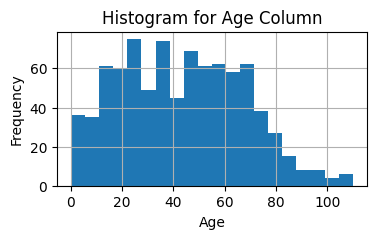

New max age after removing outliers: 89


In [22]:
# identify outliers
patn_df_ed.hist(column='Age', figsize=(4, 2), bins=20);
plt.title('Histogram for Age Column') 
plt.xlabel('Age') 
plt.ylabel('Frequency') 
plt.show() 

# remove outliers
patn_df_ed = patn_df_ed[patn_df_ed['Age'] < 90]
print("New max age after removing outliers:", patn_df_ed['Age'].max())

#### 3.6. Create age categories

,Age_Category,min,max,count
0,1,0,17,145
1,2,18,24,78
2,3,25,34,121
3,4,35,44,98
4,5,45,54,123
5,6,55,64,106
6,7,65,89,157


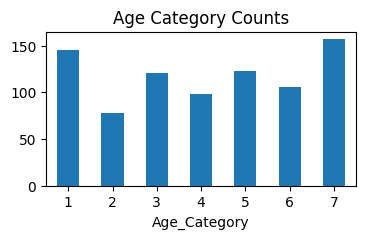

In [23]:
patn_df_ed['Age_Category'] = np.where(patn_df_ed['Age'] <= 17, 1, 
                            np.where(patn_df_ed['Age'] <= 24, 2, 
                            np.where(patn_df_ed['Age'] <= 34, 3,
                            np.where(patn_df_ed['Age'] <= 44, 4,
                            np.where(patn_df_ed['Age'] <= 54, 5,
                            np.where(patn_df_ed['Age'] <= 64, 6,    
                            np.where(patn_df_ed['Age'] >= 65, 7, 0)))))))
# check the results
age_cat = patn_df_ed.groupby('Age_Category').agg({'Age': ['min', 'max', 'count']}).reset_index()
age_cat = age_cat.droplevel(0, axis=1).rename(columns= {'':'Age_Category'})
display(age_cat)

# creating the bar plot
ax = age_cat.plot.bar(x='Age_Category', y='count', rot=0, title ="Age Category Counts", 
                      figsize=(4, 2), legend=None)
plt.show()

#### 3.7. Create healthcare expense categories

count    8.280000e+02
mean     7.795807e+05
std      5.346469e+05
min      1.822160e+03
25%      2.712843e+05
50%      7.363766e+05
75%      1.260455e+06
max      2.145924e+06
Name: HEALTHCARE_EXPENSES, dtype: float64


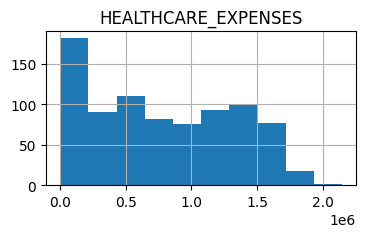

In [24]:
print(patn_df_ed['HEALTHCARE_EXPENSES'].describe())
patn_df_ed.hist(column='HEALTHCARE_EXPENSES', figsize=(4, 2));

---
> Note: 75% of the patients fall below \\$1.2 million in healthcare expenses so I will use the threshold of 1.2 million to categorize normal vs big spenders  
>
> 1 = normal spenders (<= \\$1.2 million)  
> 2 = big spenders (> \\$1.2 million)
---

,Expense_Category,min,max,count
0,1,1822.16,1199514.09,597
1,2,1204242.40,2145924.40,231


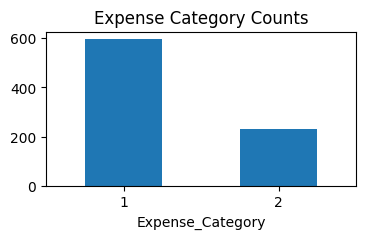

In [25]:
exp_threshold = 1200000

patn_df_ed['Expense_Category'] = np.where(patn_df_ed['HEALTHCARE_EXPENSES'] <= exp_threshold, 1, 
                                np.where(patn_df_ed['HEALTHCARE_EXPENSES'] > exp_threshold, 2, 0))

# check the results
exp_cat = patn_df_ed.groupby('Expense_Category').agg({'HEALTHCARE_EXPENSES': ['min', 'max', 'count']}).reset_index()
exp_cat = exp_cat.droplevel(0, axis=1).rename(columns= {'':'Expense_Category'})
display(exp_cat)

# creating the bar plot
ax = exp_cat.plot.bar(x='Expense_Category', y='count', rot=0, title ="Expense Category Counts", 
                      figsize=(4, 2), legend=None)
plt.show()

#### 3.8. Create gender categories 

In [26]:
# list all genders 
gender_lst = patn_df_ed['GENDER'].sort_values().unique().tolist()
print("Genders: ", gender_lst)
print()

# create a dictionary for each gender and category number
gender_dict = {}
n = 0
for c in range(0, len(gender_lst)):
    n +=1 
    gender_dict[gender_lst[c]] = n
    
print("Gender dictionary: ", gender_dict)    

Genders:  ['F', 'M']

Gender dictionary:  {'F': 1, 'M': 2}


,GENDER,Gender_Category,Count
0,F,1,457
1,M,2,371


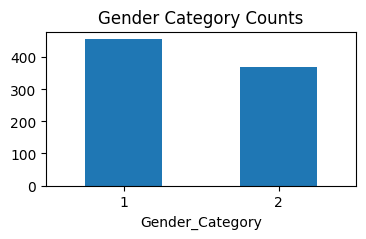

In [27]:
# look up the category
patn_df_ed['Gender_Category'] = patn_df_ed['GENDER'].map(gender_dict)
patn_df_ed['Gender_Category']

# check the results
gender_cat = patn_df_ed.groupby(['GENDER','Gender_Category']).size().reset_index(name='Count')                
display(gender_cat)

# creating the bar plot
ax = gender_cat.plot.bar(x='Gender_Category', y='Count', rot=0, title ="Gender Category Counts", 
                      figsize=(4, 2), legend=None)
plt.show()

#### 3.9. Create race categories 

In [28]:
# list all races 
race_lst = patn_df_ed['RACE'].sort_values().unique().tolist()
print("Races: ", race_lst)
print()

# create a dictionary for each race and category number
race_dict = {}
n = 0
for c in range(0, len(race_lst)):
    n +=1 
    race_dict[race_lst[c]] = n
    
print("Race dictionary: ", race_dict)    

Races:  ['asian', 'black', 'native', 'other', 'white']

Race dictionary:  {'asian': 1, 'black': 2, 'native': 3, 'other': 4, 'white': 5}


,RACE,Race_Category,Count
0,asian,1,54
1,black,2,74
2,native,3,13
3,other,4,2
4,white,5,685


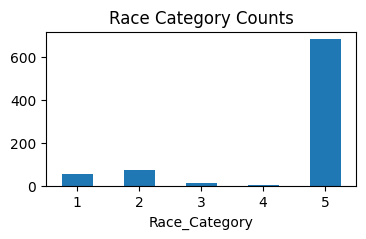

In [29]:
# look up the category
patn_df_ed['Race_Category'] = patn_df_ed['RACE'].map(race_dict)
patn_df_ed['Race_Category']

# check the results
race_cat = patn_df_ed.groupby(['RACE','Race_Category']).size().reset_index(name='Count')        
display(race_cat)

# creating the bar plot
ax = race_cat.plot.bar(x='Race_Category', y='Count', rot=0, title ="Race Category Counts", 
                      figsize=(4, 2), legend=None)
plt.show()

#### 3.10. Create county categories 

In [30]:
# list all counties 
counties_lst = patn_df_ed['COUNTY'].sort_values().unique().tolist()
print("Counties: ", counties_lst)
print()

# create a dictionary for each county and category number
counties_dict = {}
n = 0
for c in range(0, len(counties_lst)):
    n +=1 
    counties_dict[counties_lst[c]] = n
    
print("Counties dictionary: ", counties_dict)    

Counties:  ['Barnstable County', 'Berkshire County', 'Bristol County', 'Dukes County', 'Essex County', 'Franklin County', 'Hampden County', 'Hampshire County', 'Middlesex County', 'Nantucket County', 'Norfolk County', 'Plymouth County', 'Suffolk County', 'Worcester County']

Counties dictionary:  {'Barnstable County': 1, 'Berkshire County': 2, 'Bristol County': 3, 'Dukes County': 4, 'Essex County': 5, 'Franklin County': 6, 'Hampden County': 7, 'Hampshire County': 8, 'Middlesex County': 9, 'Nantucket County': 10, 'Norfolk County': 11, 'Plymouth County': 12, 'Suffolk County': 13, 'Worcester County': 14}


,COUNTY,County_Category,Count
0,Barnstable County,1,35
1,Berkshire County,2,16
2,Bristol County,3,74
3,Dukes County,4,4
4,Essex County,5,80
5,Franklin County,6,11
6,Hampden County,7,60
7,Hampshire County,8,28
8,Middlesex County,9,186
9,Nantucket County,10,2


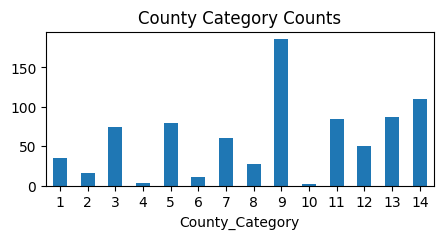

In [31]:
# look up the category
patn_df_ed['County_Category'] = patn_df_ed['COUNTY'].map(counties_dict)

# check the results
county_cat = patn_df_ed.groupby(['COUNTY','County_Category']).size().reset_index(name='Count')
display(county_cat)

# creating the bar plot
ax = county_cat.plot.bar(x='County_Category', y='Count', rot=0, title ="County Category Counts", 
                      figsize=(5, 2), legend=None)
plt.show()

#### 3.11. Create careplan indicator

In [32]:
care_df_ed['Careplan_Indicator'] = 1
care_df_summ = care_df_ed[['PATIENT','Careplan_Indicator']].drop_duplicates()
print('Careplans rows, columns: ', care_df_summ.shape)

Careplans rows, columns:  (832, 2)


#### 3.12. Create allergy one-hot encoded columns

In [33]:
allergies = algy_df_ed['DESCRIPTION'].unique().tolist()
print(allergies)

# remove extra columns
algy_df_ed.drop(['START','STOP','ENCOUNTER','CODE'], axis=1, inplace=True)

# create encoded columns
algy_df_ed_encoded = pd.get_dummies(algy_df_ed, columns = ['DESCRIPTION'], prefix = None, dtype=float) 

# remove the prefix from new columns
algy_df_ed_encoded.columns = [col.replace('DESCRIPTION_', '') for col in algy_df_ed_encoded.columns]

# get one row per patient
algy_df_ed_encoded = algy_df_ed_encoded.groupby(['PATIENT']).max()
algy_df_ed_encoded.drop(['index'], axis=1, inplace=True)

# count number of allergies per patient
algy_df_ed_encoded['Count of allergies'] = algy_df_ed_encoded.sum(axis=1)

# add a flag to indicate presence of at least 1 allergy
algy_df_ed_encoded['Allergy'] = 1

display(algy_df_ed_encoded.head(2))

['Latex allergy', 'Shellfish allergy', 'Allergy to mould', 'Dander (animal) allergy', 'Allergy to grass pollen', 'Allergy to tree pollen', 'Allergy to soya', 'Allergy to fish', 'House dust mite allergy', 'Allergy to wheat', 'Allergy to peanuts', 'Allergy to dairy product', 'Allergy to nut', 'Allergy to bee venom', 'Allergy to eggs']


,Allergy to bee venom,Allergy to dairy product,Allergy to eggs,Allergy to fish,Allergy to grass pollen,Allergy to mould,Allergy to nut,Allergy to peanuts,Allergy to soya,Allergy to tree pollen,Allergy to wheat,Dander (animal) allergy,House dust mite allergy,Latex allergy,Shellfish allergy,Count of allergies,Allergy
PATIENT,,,,,,,,,,,,,,,,,
0288abb6-633c-40c3-ba0c-66c7d957727e,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,1
076688b0-f0d5-4c45-8bc6-b206684fa9ac,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1


#### 3.13. Join datasets together into one main dataset & select features

In [34]:
# identify patient columns to keep and remove
print("patn_df columns: ", patn_df_ed.columns)
patn_df_ed_keep = ['Id', 'Age_Category', 'Expense_Category', 
                'County_Category', 'Race_Category', 'Gender_Category']
        
patn_df_cats = patn_df_ed[patn_df_ed_keep]
patn_df_cats.head(2)

patn_df columns:  Index(['index', 'Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT',
       'PREFIX', 'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE',
       'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE',
       'COUNTY', 'ZIP', 'LAT', 'LON', 'HEALTHCARE_EXPENSES',
       'HEALTHCARE_COVERAGE', 'Death_or_Curr_Dt', 'Age', 'Age_Category',
       'Expense_Category', 'Gender_Category', 'Race_Category',
       'County_Category'],
      dtype='object')


,Id,Age_Category,Expense_Category,County_Category,Race_Category,Gender_Category
0,10339b10-3cd1-4ac3-ac13-ec26728cb592,3,1,7,5,2
1,72c0b9ce-7aa4-430b-aaff-bd0ce7846e55,1,1,7,5,2


In [35]:
# identify condition columns to keep and remove
print("cond_df_pvt columns: ", cond_df_pvt.columns)

cond_df_pvt columns:  Index(['PATIENT', 'Acute allergic reaction',
       'Acute bacterial sinusitis (disorder)', 'Acute bronchitis (disorder)',
       'Acute viral pharyngitis (disorder)', 'Alcoholism',
       'Alzheimer's disease (disorder)', 'Anemia (disorder)',
       'Antepartum eclampsia', 'Appendicitis',
       ...
       'Sprain of ankle', 'Sprain of wrist',
       'Streptococcal sore throat (disorder)', 'Stroke',
       'Suspected lung cancer (situation)', 'Tear of meniscus of knee',
       'Tubal pregnancy', 'Viral sinusitis (disorder)',
       'Whiplash injury to neck', 'Count of conditions'],
      dtype='object', name='DESCRIPTION', length=131)


In [36]:
# merge the dfs together 
df = patn_df_cats.merge(cond_df_pvt, left_on='Id', right_on='PATIENT', how='left')
df = df.merge(care_df_summ, left_on='Id', right_on='PATIENT', how='left')
df = df.merge(algy_df_ed_encoded, left_on='Id', right_on='PATIENT', how='left')
df = df.merge(enct_df_pvt, left_on='Id', right_on='PATIENT', how='left')
ed_patients_df = df.drop(['PATIENT_x', 'PATIENT_y', 'Id', 'PATIENT',
                          'Ambulatory_Encounters', 'Inpatient_Encounters', 
                          'Outpatient_Encounters','Urgentcare_Encounters', 'Wellness_Encounters'                         
                         ], axis=1)

ed_patients_df = ed_patients_df.astype(float)

print("\nFeatures Selected:\n")
print(ed_patients_df.info(verbose = True))


Features Selected:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 154 columns):
 #    Column                                                                            Dtype  
---   ------                                                                            -----  
 0    Age_Category                                                                      float64
 1    Expense_Category                                                                  float64
 2    County_Category                                                                   float64
 3    Race_Category                                                                     float64
 4    Gender_Category                                                                   float64
 5    Acute allergic reaction                                                           float64
 6    Acute bacterial sinusitis (disorder)                                              float64
 7    Acu

#### 3.14. Assess and handle missing data

In [37]:
nans = ed_patients_df.isna().sum().sort_values(ascending=False)
print("Na columns before update:")
display(nans.head(20))

# fill the na's for these columns with 0
ed_patients_df.fillna(0, inplace=True)

print("\nTotal na columns after update:", ed_patients_df.isna().sum().sum())

Na columns before update:


Allergy to eggs                                         721
Allergy to tree pollen                                  721
Allergy to bee venom                                    721
Allergy to dairy product                                721
Allergy to fish                                         721
Allergy to grass pollen                                 721
Allergy to mould                                        721
Allergy to peanuts                                      721
Allergy to soya                                         721
Allergy to nut                                          721
Allergy to wheat                                        721
Dander (animal) allergy                                 721
House dust mite allergy                                 721
Latex allergy                                           721
Shellfish allergy                                       721
Count of allergies                                      721
Allergy                                 


Total na columns after update: 0


#### 3.15. Identify and remove outliers for emergency encounters

In [38]:
# identify outliers based on z score
mean = np.mean(ed_patients_df['Emergency_Encounters'])
std = np.std(ed_patients_df['Emergency_Encounters'])
 
threshold = 3
outliers = []
for x in ed_patients_df['Emergency_Encounters']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
        
print(">> Emergency Encounters")
print("Mean: ", mean)
print("Standard deviation: ", std)
print("Outliers to remove: ", outliers)

# remove outliers
ed_patients_df = ed_patients_df[~ed_patients_df['Emergency_Encounters'].isin(outliers)]

# check results
print("New Max:", ed_patients_df['Emergency_Encounters'].max())
print("New Min:", ed_patients_df['Emergency_Encounters'].min())

>> Emergency Encounters
Mean:  2.138888888888889
Standard deviation:  1.7057121204634347
Outliers to remove:  [12.0, 10.0, 9.0, 8.0, 9.0, 8.0, 19.0, 10.0, 12.0, 8.0, 8.0, 9.0, 10.0, 11.0]
New Max: 7.0
New Min: 1.0


#### 3.16. Create a reusable cleaning function from all steps

In [39]:
def clean(df):
    ''' 
    This function applies all cleaning and 
    transformation steps to the patient datasets
    '''

    if df.attrs['name'] == "enct_df_2":    

        ##### Remove patients who did not have an ED visit #####
        print("-------------")
        print("Enct_df count - all patients:", enct_df_2.shape[0])
        enct_df_ed_2 = enct_df_2[enct_df_2['PATIENT'].isin(ed_patients_2['PATIENT'])].reset_index()
        print("Enct_df_ed count - ED patients:", enct_df_ed_2.shape[0])
        
        ##### Summarize encounters per patient #####

        # find count of each encounter class by patient
        enct_df_summ_2 = enct_df_ed_2.groupby(['PATIENT','ENCOUNTERCLASS']).size().reset_index(name='Count')

        # pivot the data
        enct_df_pvt_2 = enct_df_summ_2.pivot(index='PATIENT', columns='ENCOUNTERCLASS', values='Count').reset_index()

        # fill na with 0
        enct_df_pvt_2.fillna(value=0, inplace=True)

        # rename columns
        enct_df_pvt_2.rename(columns={
                'ambulatory':'Ambulatory_Encounters', 
                'emergency':'Emergency_Encounters',
                'inpatient':'Inpatient_Encounters', 
                'outpatient':'Outpatient_Encounters',
                'urgentcare':'Urgentcare_Encounters', 
                'wellness':'Wellness_Encounters'
               }, inplace=True)
        
        return enct_df_pvt_2

    elif df.attrs['name'] == "cond_df_2":

        ##### Remove patients who did not have an ED visit #####
        print("-------------")
        print("Cond_df count - all patients:", cond_df_2.shape[0])
        cond_df_ed_2 = cond_df_2[cond_df_2['PATIENT'].isin(ed_patients_2['PATIENT'])].reset_index()
        print("Cond_df_ed count - ED patients:", cond_df_ed_2.shape[0])
        
        ##### Summarize conditions per patient #####

        # find count of each condition by patient
        cond_df_unique_2 = cond_df_ed_2[['PATIENT','DESCRIPTION']].drop_duplicates()
        cond_df_summ_2 = cond_df_unique_2.groupby(['PATIENT','DESCRIPTION']).size().reset_index(name='Count')

        # pivot the data
        cond_df_pvt_2 = cond_df_summ_2.pivot(index='PATIENT', columns='DESCRIPTION', values='Count').reset_index()

        # fill na with 0
        cond_df_pvt_2.fillna(value=0, inplace=True)

        # count the number of conditions per patient
        cond_df_pvt_2['Count of conditions'] = cond_df_pvt_2.sum(axis=1, numeric_only=True)

        return cond_df_pvt_2

    elif df.attrs['name'] == "patn_df_2":

        ##### Remove patients who did not have an ED visit #####
        print("-------------")        
        print("Patn_df count - all patients:", patn_df_2.shape[0])
        patn_df_ed_2 = patn_df_2[patn_df_2['Id'].isin(ed_patients_2['PATIENT'])].reset_index()
        print("Patn_df_ed count - ED patients:", patn_df_ed_2.shape[0])

        ##### Create a column for patient age #####
        
        # format the birth and death dates
        patn_df_ed_2['DEATHDATE'] = pd.to_datetime(patn_df_ed_2['DEATHDATE']).dt.date
        patn_df_ed_2['BIRTHDATE'] = pd.to_datetime(patn_df_ed_2['BIRTHDATE']).dt.date

        # find the min/max birth and death dates 
        bd = patn_df_ed_2[patn_df_ed_2['BIRTHDATE'].notnull()]
        dd = patn_df_ed_2[patn_df_ed_2['DEATHDATE'].notnull()]
        max_dt = max(bd['BIRTHDATE'].max(), dd['DEATHDATE'].max())

        # set the current date as the 1st day of month following max_dt
        current_dt = ((max_dt.replace(day=1) + timedelta(days=32)).replace(day=1))

        # create a new column with death date, if null then current date
        patn_df_ed_2['Death_or_Curr_Dt'] = np.where(patn_df_ed_2['DEATHDATE'].isnull(), current_dt, patn_df_ed_2['DEATHDATE'])

        # calculate age
        patn_df_ed_2['Age'] = np.vectorize(calculate_age)(patn_df_ed_2['BIRTHDATE'], patn_df_ed_2['Death_or_Curr_Dt'])

        ##### Remove outliers for patient age #####
        patn_df_ed_2 = patn_df_ed_2[patn_df_ed_2['Age'] < 90]

        ##### Create age categories #####
        patn_df_ed_2['Age_Category'] = np.where(patn_df_ed_2['Age'] <= 17, 1, 
                                np.where(patn_df_ed_2['Age'] <= 24, 2, 
                                np.where(patn_df_ed_2['Age'] <= 34, 3,
                                np.where(patn_df_ed_2['Age'] <= 44, 4,
                                np.where(patn_df_ed_2['Age'] <= 54, 5,
                                np.where(patn_df_ed_2['Age'] <= 64, 6,    
                                np.where(patn_df_ed_2['Age'] >= 65, 7, 0)))))))

        # check the results
        age_cat = patn_df_ed_2.groupby('Age_Category').agg({'Age': ['min', 'max', 'count']}).reset_index()
        age_cat = age_cat.droplevel(0, axis=1).rename(columns= {'':'Age_Category'})
        display(age_cat)
        
        # creating the bar plot
        ax = age_cat.plot.bar(x='Age_Category', y='count', rot=0, title ="Age Category Counts", 
                          figsize=(4, 2), legend=None)
        plt.show()   

        ##### Create healthcare expense categories #####
        print(patn_df_ed_2['HEALTHCARE_EXPENSES'].describe())
        patn_df_ed_2.hist(column='HEALTHCARE_EXPENSES', figsize=(4, 2));   

        exp_threshold = 1200000
        patn_df_ed_2['Expense_Category'] = np.where(patn_df_ed_2['HEALTHCARE_EXPENSES'] <= exp_threshold, 1, 
                                        np.where(patn_df_ed_2['HEALTHCARE_EXPENSES'] > exp_threshold, 2, 0))
        patn_df_ed_2['Expense_Label'] = np.where(patn_df_ed_2['Expense_Category'] == 1, '<='+str(exp_threshold), 
                                    np.where(patn_df_ed_2['Expense_Category'] == 2, '>'+str(exp_threshold), ''))
        
        # check the results 
        exp_cat = patn_df_ed_2.groupby(['Expense_Category','Expense_Label']).agg({'HEALTHCARE_EXPENSES': ['min', 'max', 'count']}).reset_index()
        exp_cat = exp_cat.droplevel(0, axis=1)
        exp_cat.columns.values[[0, 1]] = ['Expense_Category', 'Expense_Label']
        display(exp_cat)
        
        # creating the bar plot
        ax = exp_cat.plot.bar(x=exp_cat.columns[0], y='count', rot=0, title ="Expense Category Counts", 
                              figsize=(4, 2), legend=None)
        plt.show()    

        ##### Create gender categories #####
        # list all genders 
        gender_lst = patn_df_ed_2['GENDER'].sort_values().unique().tolist()

        # create a dictionary for each gender and category number
        gender_dict = {}
        n = 0
        for c in range(0, len(gender_lst)):
            n +=1 
            gender_dict[gender_lst[c]] = n

        # look up the category
        patn_df_ed_2['Gender_Category'] = patn_df_ed_2['GENDER'].map(gender_dict)

        # check the results
        gender_cat = patn_df_ed_2.groupby(['GENDER','Gender_Category']).size().reset_index(name='Count')                
        display(gender_cat)
        
        # creating the bar plot
        ax = gender_cat.plot.bar(x='Gender_Category', y='Count', rot=0, title ="Gender Category Counts", 
                              figsize=(4, 2), legend=None)
        plt.show()

        ##### Create race categories #####
        # list all races 
        race_lst = patn_df_ed_2['RACE'].sort_values().unique().tolist()

        # create a dictionary for each race and category number
        race_dict = {}
        n = 0
        for c in range(0, len(race_lst)):
            n +=1 
            race_dict[race_lst[c]] = n

        # look up the category
        patn_df_ed_2['Race_Category'] = patn_df_ed_2['RACE'].map(race_dict)

        # check the results
        race_cat = patn_df_ed_2.groupby(['RACE','Race_Category']).size().reset_index(name='Count')        
        display(race_cat)

        # creating the bar plot
        ax = race_cat.plot.bar(x='Race_Category', y='Count', rot=0, title ="Race Category Counts", 
                              figsize=(4, 2), legend=None)
        plt.show()    

        ##### Create county categories #####
        # list all counties 
        counties_lst = patn_df_ed_2['COUNTY'].sort_values().unique().tolist()

        # create a dictionary for each county and category number
        counties_dict = {}
        n = 0
        for c in range(0, len(counties_lst)):
            n +=1 
            counties_dict[counties_lst[c]] = n

        # look up the category
        patn_df_ed_2['County_Category'] = patn_df_ed_2['COUNTY'].map(counties_dict)

        # check the results
        county_cat = patn_df_ed_2.groupby(['COUNTY','County_Category']).size().reset_index(name='Count')
        display(county_cat)
        
        # creating the bar plot
        ax = county_cat.plot.bar(x='County_Category', y='Count', rot=0, title ="County Category Counts", 
                              figsize=(5, 2), legend=None)
        plt.show()

        return patn_df_ed_2

    elif df.attrs['name'] == "care_df_2":
 
        ##### Remove patients who did not have an ED visit #####
        print("-------------")    
        print("Care_df count - all patients:", care_df_2.shape[0])
        care_df_ed_2 = care_df_2[care_df_2['PATIENT'].isin(ed_patients_2['PATIENT'])].reset_index()
        print("Care_df_ed count - ED patients:", care_df_ed_2.shape[0])
 
        ##### Create careplan indicator #####
        care_df_ed_2['Careplan_Indicator'] = 1
        care_df_summ_2 = care_df_ed_2[['PATIENT','Careplan_Indicator']].drop_duplicates()
        
        return care_df_summ_2

    elif df.attrs['name'] == "algy_df_2":

        ##### Remove patients who did not have an ED visit #####
        print("-------------")        
        print("Algy_df count - all patients:", algy_df_2.shape[0])
        algy_df_ed_2 = algy_df_2[algy_df_2['PATIENT'].isin(ed_patients_2['PATIENT'])].reset_index()
        print("Algy_df_ed count - ED patients:", algy_df_ed_2.shape[0])
 
        ##### Create allergy one-hot encoded columns #####
        allergies = algy_df_ed['DESCRIPTION'].unique().tolist()
        algy_dict = {'Mold (organism)':'Allergy to mould',
                    'House dust mite (organism)':'House dust mite allergy',
                    'Animal dander (substance)':'Dander (animal) allergy',
                    'Shellfish (substance)':'Shellfish allergy',
                    'Tree pollen (substance)':'Allergy to tree pollen',
                    'Aspirin':'Other',
                    "Cow's milk (substance)":'Allergy to dairy product',
                    'cefdinir':'Other',
                    'Grass pollen (substance)':'Allergy to grass pollen',
                    'Eggs (edible) (substance)':'Allergy to eggs',
                    'Wheat (substance)':'Allergy to wheat',
                    'Fish (substance)':'Allergy to fish',
                    'Tree nut (substance)':'Allergy to nut',
                    'Soya bean (substance)':'Allergy to soya',
                    'Latex (substance)':'Latex allergy',
                    'Peanut (substance)':'Allergy to peanuts',
                    'Penicillin V':'Other',
                    'Bee venom (substance)':'Allergy to bee venom', 
                    'Lisinopril':'Other',
                    'Sulfamethoxazole / Trimethoprim':'Other'}

        algy_df_ed_2['Allergy_Category'] = algy_df_ed_2['DESCRIPTION'].map(algy_dict)

        # remove extra columns
        algy_df_ed_2.drop(['START','STOP','ENCOUNTER','CODE','SYSTEM','DESCRIPTION','TYPE','CATEGORY','REACTION1',
                        'DESCRIPTION1','SEVERITY1','DESCRIPTION2','SEVERITY2','REACTION2'], axis=1, inplace=True)

        # create encoded columns
        algy_df_ed_encoded_2 = pd.get_dummies(algy_df_ed_2, columns = ['Allergy_Category'], prefix = None, dtype=float) 

        # remove the prefix from new columns
        algy_df_ed_encoded_2.columns = [col.replace('Allergy_Category_', '') for col in algy_df_ed_encoded_2.columns]

        # get one row per patient
        algy_df_ed_encoded_2 = algy_df_ed_encoded_2.groupby(['PATIENT']).max()
        algy_df_ed_encoded_2.drop(['index'], axis=1, inplace=True)

        # count number of allergies per patient
        algy_df_ed_encoded_2['Count of allergies'] = algy_df_ed_encoded_2.sum(axis=1)

        # add a flag to indicate presence of at least 1 allergy
        algy_df_ed_encoded_2['Allergy'] = 1
        
        return algy_df_ed_encoded_2 

---
### 4. Principal Component Analysis for 2020 Dataset
Investigate the variance accounted for by each Principal Component*.

*Principal Components are derived variables formed from a linear combination of all original variables. The 1st Principal Component explains the most variance in the data, the 2nd Principal Component explains the most variance after removing the 1st component, and so on. (Reference: https://en.wikipedia.org/wiki/Principal_component_analysis)  


#### 4.1. Apply feature scaling

In [40]:
# Apply feature scaling to data
scaler = StandardScaler()
ed_patients_scaled = scaler.fit_transform(ed_patients_df)

#### 4.2. Apply PCA

In [41]:
# Apply PCA to the data
pca = PCA()
ed_patients_pca = pca.fit(ed_patients_scaled)

In [42]:
# get the pca explained variance ratios
var = pca.explained_variance_ratio_
print("Explained Variance Ratio for Top 15 Components:\n", var[:15])

# get the cumulative pca explained variance ratios
cumsum = np.cumsum(var)
print("\nCumulative Explained Variance Ratio for Top 15 Components:\n", cumsum[:15])

Explained Variance Ratio for Top 15 Components:
 [0.06418339 0.04733125 0.02741755 0.02453848 0.02206397 0.02159342
 0.01932073 0.01875572 0.0181905  0.01737986 0.0154088  0.01477811
 0.01379025 0.01348668 0.01259846]

Cumulative Explained Variance Ratio for Top 15 Components:
 [0.06418339 0.11151465 0.13893219 0.16347068 0.18553464 0.20712806
 0.22644879 0.24520452 0.26339501 0.28077488 0.29618368 0.31096179
 0.32475204 0.33823872 0.35083717]


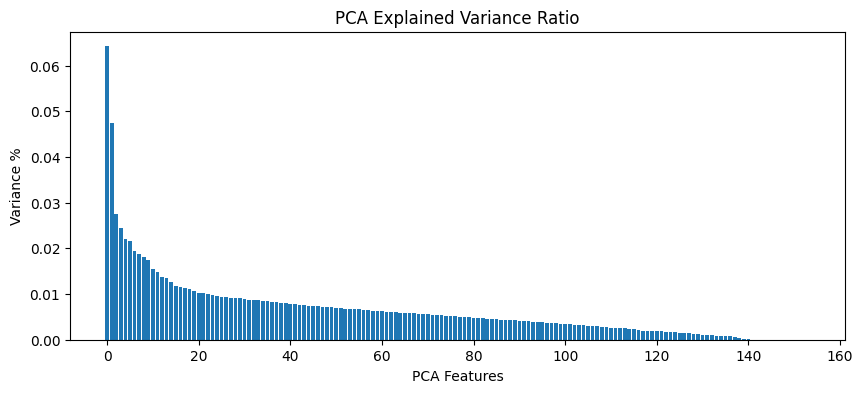

In [43]:
# plot explained variance ratios
plt.figure(figsize=(10, 4))
plt.bar(list(range(var.shape[0])), var)
plt.title('PCA Explained Variance Ratio')
plt.xlabel('PCA Features')
plt.ylabel('Variance %')
plt.show();

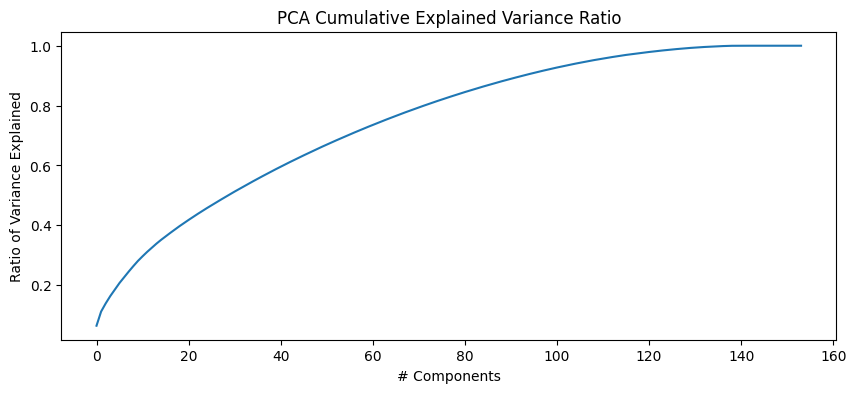

In [44]:
# plot cumulative explained variance ratios
plt.figure(figsize=(10, 4))
plt.plot(list(range(var.shape[0])), cumsum)
plt.title('PCA Cumulative Explained Variance Ratio')
plt.xlabel("# Components")
plt.ylabel("Ratio of Variance Explained")
plt.show();

---
> Note: I will retain 80 principal components which explain around 80% of the variance
---

In [45]:
# re-apply PCA to the data with the # components to retain
num_comp = 80
pca = PCA(n_components = num_comp)
ed_patient_pca = pca.fit_transform(ed_patients_scaled)

In [46]:
def pca_weights(full_dataset, pca, i):
    '''
    Function to print the sorted list of feature weights, for the i-th principal component
    Create a DataFrame of the PCA results mapped to full dataset columns
    Print the sorted list of feature weights for the i-th principal component
    '''    
    components = pca.components_
    df = pd.DataFrame(components, columns=list(full_dataset.columns))
    n = i - 1  
    if (n >= 0) and (n < len(components)):    
        weights = df.iloc[n].sort_values(ascending=False)
        return weights        
    else: 
        return "Error: i was out of bounds"

In [47]:
# Map weights for the first principal component to corresponding 
# feature names and then print the linked values, sorted by weight 
pca_weights(ed_patients_df, pca, 1)

Count of allergies                 0.289806
Dander (animal) allergy            0.268423
Allergy to mould                   0.264572
Allergy to tree pollen             0.256529
Allergy to grass pollen            0.253822
                                     ...   
Diabetes                          -0.102804
Hypertriglyceridemia (disorder)   -0.107076
Metabolic syndrome X (disorder)   -0.107076
Count of conditions               -0.121482
Age_Category                      -0.149146
Name: 0, Length: 154, dtype: float64

In [48]:
# Map weights for the second principal component to corresponding 
# feature names and then print the linked values, sorted by weight 
pca_weights(ed_patients_df, pca, 2)

Hypertriglyceridemia (disorder)          0.283088
Metabolic syndrome X (disorder)          0.283088
Diabetes                                 0.281236
Count of conditions                      0.269818
Hyperglycemia (disorder)                 0.237135
                                           ...   
Epilepsy                                -0.029767
Normal pregnancy                        -0.031303
Seizure disorder                        -0.035575
History of single seizure (situation)   -0.035575
Race_Category                           -0.052147
Name: 1, Length: 154, dtype: float64

In [49]:
# Map weights for the third principal component to corresponding 
# feature names and then print the linked values, sorted by weight 
pca_weights(ed_patients_df, pca, 3)

Suspected lung cancer (situation)                                            0.281800
Carcinoma in situ of prostate (disorder)                                     0.258995
Neoplasm of prostate                                                         0.244128
Non-small cell carcinoma of lung  TNM stage 1 (disorder)                     0.231243
Non-small cell lung cancer (disorder)                                        0.231243
                                                                               ...   
Diabetic retinopathy associated with type II diabetes mellitus (disorder)   -0.132341
Hyperglycemia (disorder)                                                    -0.161249
Diabetes                                                                    -0.174201
Metabolic syndrome X (disorder)                                             -0.174926
Hypertriglyceridemia (disorder)                                             -0.174926
Name: 2, Length: 154, dtype: float64

---
> #### Principal Component Analysis   
>   
> **1st Principal Component**  
> The first principal component is correlated with total count of allergies, dander allergy, and mold allergy.  
> As these variables increase, the principal component increases.  
> - Count of allergies                 0.289806
> - Dander (animal) allergy            0.268423
> - Allergy to mould                   0.264572
>   
> **2nd Principal Component**  
> The 2nd principal component is correlated with Hypertriglyceridemia, Metabolic syndrome X, and Diabetes.  
> As these variables increase, the principal component increases.  
> - Hypertriglyceridemia (disorder)          0.283088
> - Metabolic syndrome X (disorder)          0.283088
> - Diabetes                                 0.281237
>  
> **3rd Principal Component**  
> The 3rd principal component is correlated with suspected lung cancer and Carcinoma in situ of prostate.  
> As these variables increase, the principal component increases.  
> - Suspected lung cancer (situation)        0.281800
> - Carcinoma in situ of prostate (disorder)     0.259003
---


### 5. K-Means Clustering on 2020 Dataset
Apply K-Means clustering to the dataset for a range of clusters, calculate a score related to the model fit, and decide on a number of clusters to keep in the model.

In [50]:
scores = []
s_scores = []
centers = list(range(1,31))
print("Scores by # of Clusters:")
for x in centers:
    kmeans = KMeans(n_clusters=x, random_state=0)
    model = kmeans.fit(ed_patient_pca)
    model_pred = kmeans.fit_predict(ed_patient_pca)

    # Compute the average within-cluster distances
    # Obtain a score related to the model fit
    score = np.abs(model.score(ed_patient_pca))
    scores.append([x, score])    

    # Compute the silhouette score
    # Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
    if x >= 2:
        s_score = silhouette_score(ed_patient_pca, model_pred)
        s_scores.append([x, s_score])    
    elif x < 2:
        s_score = 0
    
    print(x, "Clusters:  ", "Model Score =", round(score,2), 
                            " |  Silhouette Score =", round(s_score,2))

Scores by # of Clusters:
1 Clusters:   Model Score = 105067.26  |  Silhouette Score = 0
2 Clusters:   Model Score = 98243.75  |  Silhouette Score = 0.28
3 Clusters:   Model Score = 93211.15  |  Silhouette Score = 0.29
4 Clusters:   Model Score = 90796.95  |  Silhouette Score = 0.09
5 Clusters:   Model Score = 88609.24  |  Silhouette Score = 0.09
6 Clusters:   Model Score = 87188.26  |  Silhouette Score = 0.11
7 Clusters:   Model Score = 84623.0  |  Silhouette Score = 0.03
8 Clusters:   Model Score = 84332.78  |  Silhouette Score = 0.22
9 Clusters:   Model Score = 81564.65  |  Silhouette Score = 0.04
10 Clusters:   Model Score = 80276.79  |  Silhouette Score = 0.04
11 Clusters:   Model Score = 78926.48  |  Silhouette Score = 0.1
12 Clusters:   Model Score = 77476.24  |  Silhouette Score = 0.08
13 Clusters:   Model Score = 76178.28  |  Silhouette Score = 0.09
14 Clusters:   Model Score = 75746.56  |  Silhouette Score = 0.05
15 Clusters:   Model Score = 72868.77  |  Silhouette Score = 0.0

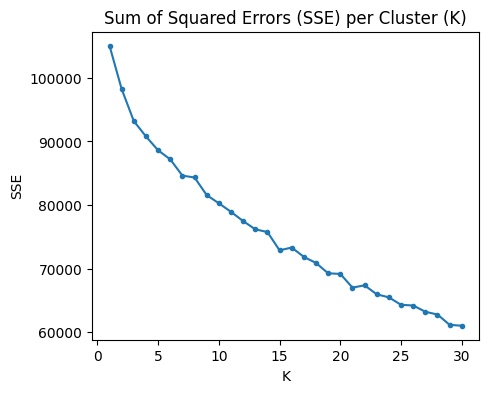

In [51]:
# Investigate the change in within-cluster distance across number of clusters
s = [i[1] for i in scores]
plt.figure(figsize=(5, 4))
plt.plot(centers, s, linestyle='-', marker='.')
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('Sum of Squared Errors (SSE) per Cluster (K)');

---
> Note:   
> I will fit the model using 3 clusters.   
> This was selected using the following methods:
> - Sum of Squared Erros (SSE) - SSE was calculated then plotted above to investigate the change in within-cluster distance among the clusters. 
> - Elbow Criterion - Shown in the chart above, the SSE begins to decrease more gradually after around this point indicating an optimal number of clusters for the model.  
> - Silhouette Score - The best Silhouette Score resulted from this number of clusters, indicating that each point is most similar to its cluster resulting in a more-defined clustering.  
---

In [52]:
# Re-fit the model with the selected number of clusters
clusters = 3
kmeans = KMeans(n_clusters=clusters, random_state=10)
model_n = kmeans.fit(ed_patient_pca)

# make predictions 
ed_patient_pred = model_n.predict(ed_patient_pca)

# Compute the average within-cluster distances
# Obtain a score related to the model fit
score = np.abs(model_n.score(ed_patient_pca))
print("Score for Model Fit,", clusters, "Clusters:", round(score,2))

# Compute the silhouette_score
s_score = silhouette_score(ed_patient_pca, ed_patient_pred)
print("\nSilhouette Score,", clusters, "Clusters:", round(s_score, 2))

Score for Model Fit, 3 Clusters: 93211.15

Silhouette Score, 3 Clusters: 0.29


---
### 6. Data Cleaning, Feature Engineering, PCA & Clustering for 2021 Dataset

#### 6.1. Setup

In [53]:
# get the filenames from the folder
path = "data/2021/"
files = os.listdir(path)
print("Files:", files)   

Files: ['allergies.csv', 'careplans.csv', 'claims.csv', 'claims_transactions.csv', 'conditions.csv', 'devices.csv', 'encounters.csv', 'imaging_studies.csv', 'immunizations.csv', 'medications.csv', 'observations.csv', 'organizations.csv', 'patients.csv', 'payers.csv', 'payer_transitions.csv', 'procedures.csv', 'providers.csv', 'supplies.csv']


In [54]:
# Read files into dataframes 
care_df_2 = pd.read_csv(path + "careplans.csv")
cond_df_2 = pd.read_csv(path + "conditions.csv")
enct_df_2 = pd.read_csv(path + "encounters.csv")
patn_df_2 = pd.read_csv(path + "patients.csv")
algy_df_2 = pd.read_csv(path + "allergies.csv")

care_df_2.attrs['name'] = 'care_df_2'
cond_df_2.attrs['name'] = 'cond_df_2'
enct_df_2.attrs['name'] = 'enct_df_2'
patn_df_2.attrs['name'] = 'patn_df_2'
algy_df_2.attrs['name'] = 'algy_df_2'

In [55]:
# identify patients with emergency encounters
ed_patients_2 = enct_df_2[enct_df_2['ENCOUNTERCLASS'] == 'emergency']
ed_patients_2 = ed_patients_2[['ENCOUNTERCLASS','PATIENT']].drop_duplicates()

#### 6.2. Apply cleaning and feature engineering steps

-------------
Enct_df count - all patients: 61459
Enct_df_ed count - ED patients: 51380
-------------
Cond_df count - all patients: 38094
Cond_df_ed count - ED patients: 30460
-------------
Care_df count - all patients: 3931
Care_df_ed count - ED patients: 3296
-------------
Algy_df count - all patients: 794
Algy_df_ed count - ED patients: 668
-------------
Patn_df count - all patients: 1163
Patn_df_ed count - ED patients: 831


,Age_Category,min,max,count
0,1,0,17,139
1,2,18,24,72
2,3,25,34,109
3,4,35,44,92
4,5,45,54,131
5,6,55,64,109
6,7,65,89,150


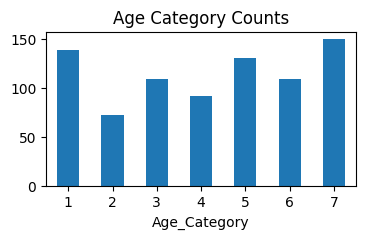

count    8.020000e+02
mean     1.321441e+06
std      9.557991e+05
min      1.594455e+04
25%      5.556110e+05
50%      1.264774e+06
75%      1.948531e+06
max      1.264179e+07
Name: HEALTHCARE_EXPENSES, dtype: float64


,Expense_Category,Expense_Label,min,max,count
0,1,<=1200000,1.594455e+04,1.199560e+06,383
1,2,>1200000,1.204766e+06,1.264179e+07,419


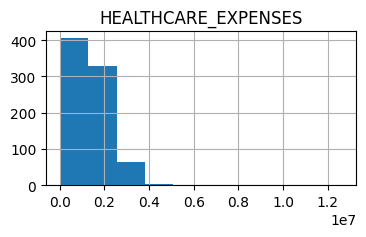

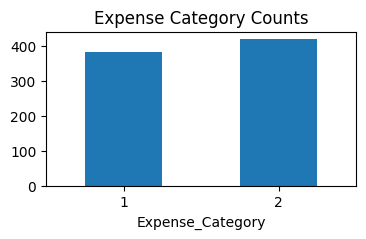

,GENDER,Gender_Category,Count
0,F,1,449
1,M,2,353


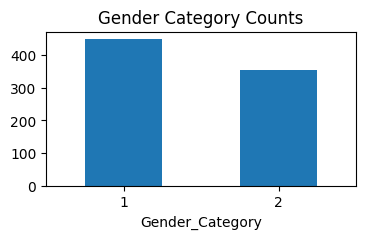

,RACE,Race_Category,Count
0,asian,1,49
1,black,2,63
2,hawaiian,3,14
3,native,4,1
4,other,5,6
5,white,6,669


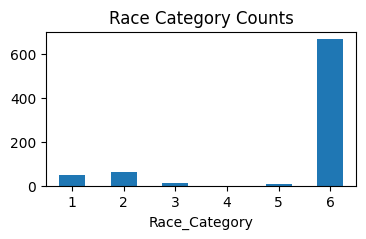

,COUNTY,County_Category,Count
0,Barnstable County,1,44
1,Berkshire County,2,11
2,Bristol County,3,76
3,Essex County,4,88
4,Franklin County,5,20
5,Hampden County,6,56
6,Hampshire County,7,19
7,Middlesex County,8,161
8,Norfolk County,9,88
9,Plymouth County,10,68


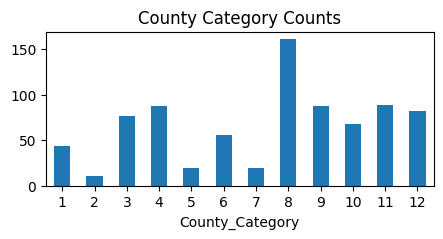

In [56]:
enct_df_pvt_2 = clean(enct_df_2)
cond_df_pvt_2 = clean(cond_df_2)
care_df_summ_2 = clean(care_df_2)
algy_df_ed_encoded_2 = clean(algy_df_2)
patn_df_ed_2 = clean(patn_df_2);

#### 6.3. Join all datasets together into one dataset 

In [57]:
# identify patient columns to keep and remove
patn_df_ed_keep_2 = ['Id', 'Age_Category', 'Expense_Category', 
                'County_Category', 'Race_Category', 'Gender_Category']        
patn_df_cats_2 = patn_df_ed_2[patn_df_ed_keep_2]

# merge the dfs together 
df_2 = patn_df_cats_2.merge(cond_df_pvt_2, left_on='Id', right_on='PATIENT', how='left')
df_2 = df_2.merge(care_df_summ_2, left_on='Id', right_on='PATIENT', how='left')
df_2 = df_2.merge(algy_df_ed_encoded_2, left_on='Id', right_on='PATIENT', how='left')
df_2 = df_2.merge(enct_df_pvt_2, left_on='Id', right_on='PATIENT', how='left')

# only keep the columns that appeared in the original df
ed_patients_df_2 = df_2[df_2.columns.intersection(ed_patients_df.columns)]

# add columns that appeared in the original df but are not in new df
original_df_cols = ed_patients_df.columns.values.tolist()
new_df_cols = ed_patients_df_2.columns.values.tolist()
missing_cols = []
for c in original_df_cols:
    if c not in new_df_cols:
        missing_cols.append(c)

print("Columns to add:", missing_cols)
ed_patients_df_2 = pd.concat([ed_patients_df_2, pd.DataFrame(columns = missing_cols)])

# put columns in the same order as the original df
ed_patients_df_2 = ed_patients_df_2[ed_patients_df.columns]

ed_patients_df_2 = ed_patients_df_2.astype(float)

Columns to add: ['Burn injury(morphologic abnormality)', 'Fracture of vertebral column without spinal cord injury', 'Major depression  single episode', 'Primary small cell malignant neoplasm of lung  TNM stage 1 (disorder)', 'Small cell carcinoma of lung (disorder)']


In [58]:
print("Total rows, columns:", ed_patients_df_2.shape)
print("\nFeatures selected:\n")
print(ed_patients_df_2.info(verbose = True))    

Total rows, columns: (802, 154)

Features selected:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 154 columns):
 #    Column                                                                            Dtype  
---   ------                                                                            -----  
 0    Age_Category                                                                      float64
 1    Expense_Category                                                                  float64
 2    County_Category                                                                   float64
 3    Race_Category                                                                     float64
 4    Gender_Category                                                                   float64
 5    Acute allergic reaction                                                           float64
 6    Acute bacterial sinusitis (disorder)                               

#### 6.4. Identify & handle missing data 

In [59]:
# Identify missing data 
nulls = ed_patients_df_2.isna().sum().sort_values(ascending=False)
print("Na columns before update:")
display(nulls.head(30))

# fill na's for these columns with 0
ed_patients_df_2.fillna(0, inplace=True)

print("\nTotal na columns after update:", ed_patients_df_2.isna().sum().sum())

Na columns before update:


Fracture of vertebral column without spinal cord injury                  802
Major depression  single episode                                         802
Burn injury(morphologic abnormality)                                     802
Primary small cell malignant neoplasm of lung  TNM stage 1 (disorder)    802
Small cell carcinoma of lung (disorder)                                  802
Allergy to peanuts                                                       653
Allergy to bee venom                                                     653
Allergy to eggs                                                          653
Allergy to fish                                                          653
Allergy to grass pollen                                                  653
Allergy to nut                                                           653
Allergy to dairy product                                                 653
Allergy to soya                                                          653


Total na columns after update: 0


#### 6.5. Remove outliers for emergency encounters

In [60]:
# identify outliers based on z score
mean = np.mean(ed_patients_df_2['Emergency_Encounters'])
std = np.std(ed_patients_df_2['Emergency_Encounters'])
 
threshold = 3
outliers = []
for x in ed_patients_df_2['Emergency_Encounters']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
        
print(">> Emergency Encounters")
print("Mean: ", mean)
print("Standard deviation: ", std)
print("Outliers to remove: ", outliers)

# remove outliers
ed_patients_df_2 = ed_patients_df_2[~ed_patients_df_2['Emergency_Encounters'].isin(outliers)]

# check results
print("New Max:", ed_patients_df_2['Emergency_Encounters'].max())
print("New Min:", ed_patients_df_2['Emergency_Encounters'].min())

>> Emergency Encounters
Mean:  2.4376558603491274
Standard deviation:  6.225739226708293
Outliers to remove:  [23.0, 171.0]
New Max: 18.0
New Min: 1.0


#### 6.6. Apply feature scaling, PCA and K-Means model

In [61]:
# Apply feature scaling to data
ed_patients_scaled_2 = scaler.transform(ed_patients_df_2)

# Apply pca transformation
ed_patients_pca_2 = pca.transform(ed_patients_scaled_2)

# Predict using Kmeans 
ed_patient_pred_2 = model_n.predict(ed_patients_pca_2)

---
### 7. Compare the 2020 and 2021 Dataset Clusters

In [62]:
# create new df's for the predictions
clust_2020_df = pd.DataFrame(ed_patient_pred, columns = ['2020_cluster'])
clust_2021_df = pd.DataFrame(ed_patient_pred_2, columns = ['2021_cluster'])

# find the value counts by cluster
cluster_predict_2020 = pd.Series(ed_patient_pred).value_counts().sort_index()
cluster_predict_2021 = pd.Series(ed_patient_pred_2).value_counts().sort_index()

# combine into a new df: df_predictions
df_predictions = pd.concat([cluster_predict_2020, cluster_predict_2021], axis=1).reset_index()
df_predictions.columns = ['Cluster', '2020_Data', '2021_Data']

# adding new columns to df_predictions with precent of total 
df_predictions['2020_Percent'] = (df_predictions['2020_Data'] / df_predictions['2020_Data'].sum()*100).round(0)
df_predictions['2021_Percent'] = (df_predictions['2021_Data'] / df_predictions['2021_Data'].sum()*100).round(0)
print("Count of values and percent of total for each cluster:\n")
display(df_predictions)

Count of values and percent of total for each cluster:



,Cluster,2020_Data,2021_Data,2020_Percent,2021_Percent
0,0,706,677,87.0,85.0
1,1,57,71,7.0,9.0
2,2,51,52,6.0,6.0


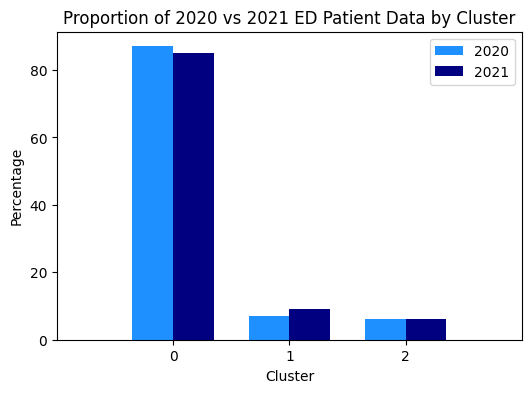

In [63]:
# Compare the proportion of data in each cluster for the 2020 and 2021 datasets
ind = np.arange(clusters)  # the x locations for the groups
width = 0.35        # the width of the bars

fig = plt.figure(figsize=(6,4))
ax = df_predictions['2020_Percent'].plot(x=df_predictions['Cluster'], kind='bar', color='dodgerblue', width=width, position=1)
ax = df_predictions['2021_Percent'].plot(x=df_predictions['Cluster'], kind='bar', color='navy', width=width, position=0)

ax.set_xlabel('Cluster') 
ax.set_ylabel('Percentage') 
ax.set_xlim(-1, clusters)
plt.xticks(rotation=0,)
plt.legend(('2020', '2021')) 
plt.title('Proportion of 2020 vs 2021 ED Patient Data by Cluster') 
plt.show();

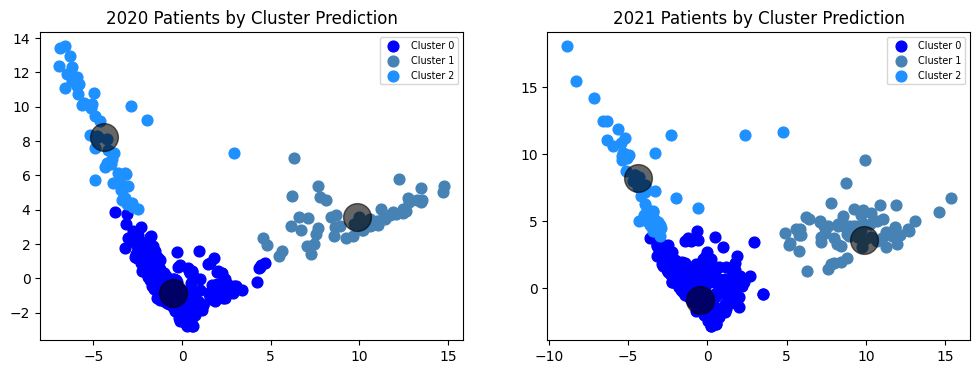

In [64]:
# Plot cluster centers for observations and predictions
# Reference: https://stackoverflow.com/questions/72096141/how-to-put-label-in-clustering-plotted-image-indicating-in-the-side-which-clus
clust_centers = model_n.cluster_centers_

labels = ["Cluster " + str(x) for x in range(0,clusters)]
colors = {0:'blue', 1:'steelblue', 2:'dodgerblue'}
label_color1 = [colors[l] for l in ed_patient_pred]
label_color2 = [colors[l] for l in ed_patient_pred_2]

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for i in range(clusters):
    color = colors[i]
    idx1 = ed_patient_pred == i
    idx2 = ed_patient_pred_2 == i
    
    # 2020 data
    ax[0].scatter(ed_patient_pca[idx1, 0], ed_patient_pca[idx1, 1], c=color, label=labels[i], s=60)  
    ax[0].scatter(clust_centers[i, 0], clust_centers[i, 1], c='black', s=400, alpha=0.6)
    ax[0].set_title('2020 Patients by Cluster Prediction')
    
    #2021 data
    ax[1].scatter(ed_patients_pca_2[idx2, 0], ed_patients_pca_2[idx2, 1], c=color, label=labels[i], s=60)
    ax[1].scatter(clust_centers[i, 0], clust_centers[i, 1], c='black', s=400, alpha=0.6)
    ax[1].set_title('2021 Patients by Cluster Prediction')    

ax[0].legend(fontsize='x-small')
ax[1].legend(fontsize='x-small')
plt.show();

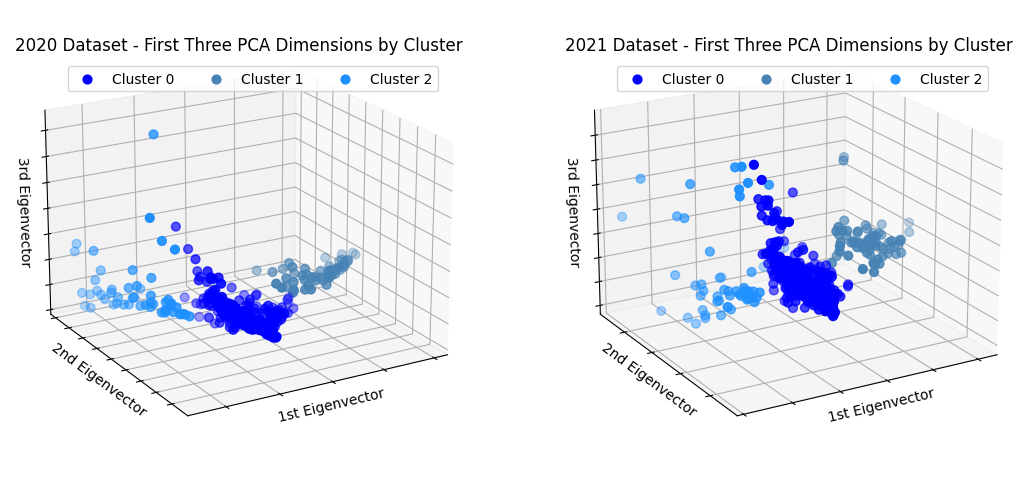

In [65]:
# create a function for a 3d plot
def plot_3d(year1, pca_data1, pred_data1, year2, pca_data2, pred_data2, clusters):
    '''
    Create a 3d plot with 2 subplots
    Reference: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py 
    '''
    fig, ax = plt.subplots(1, 2, figsize=(13,13), subplot_kw = dict(projection='3d', elev=20, azim=600))
 
    c = 0
    colors = {0:'blue', 1:'steelblue', 2:'dodgerblue'}

    for x in range(0,clusters):
        ax[0].scatter(pca_data1[pred_data1 == c,0],
                   pca_data1[pred_data1 == c,1],
                   pca_data1[pred_data1 == c,2], 
                   s = 40, color = colors[c], label = "Cluster "+str(c) )
        ax[1].scatter(pca_data2[pred_data2 == c,0],
                   pca_data2[pred_data2 == c,1],
                   pca_data2[pred_data2 == c,2], 
                   s = 40, color = colors[c], label = "Cluster "+str(c) )        
        c+=1

    for x in range(0,2):
        ax[x].set_xlabel('1st Eigenvector')
        ax[x].set_ylabel('2nd Eigenvector')
        ax[x].set_zlabel('3rd Eigenvector')
        ax[x].xaxis.labelpad = -10 
        ax[x].yaxis.labelpad = -10 
        ax[x].zaxis.labelpad = -10 
        ax[x].xaxis.set_ticklabels([])
        ax[x].yaxis.set_ticklabels([])
        ax[x].zaxis.set_ticklabels([])
        ax[x].legend(bbox_to_anchor=(0.95, 0.89), ncol=3) 
        
        y = str(year1 if x == 0 else year2)
        ax[x].set_title(y + " Dataset - First Three PCA Dimensions by Cluster", y=0.97)
    
    plt.tight_layout()
    plt.show()

# call the function
plot_3d(2020, ed_patient_pca, ed_patient_pred, 2021, ed_patients_pca_2, ed_patient_pred_2, clusters)

---
### 8. Analysis of Results for 2021 Dataset

#### 8.1. Cluster 0 Analysis

In [66]:
extracted_data_0 = scaler.inverse_transform(np.dot(ed_patients_pca_2, pca.components_))[np.where(ed_patient_pred_2==0)]
extracted_data_0 = pd.DataFrame(extracted_data_0, columns=ed_patients_df_2.columns)
print("Cluster 0 Rows:", extracted_data_0.shape[0])
display(extracted_data_0.head())

Cluster 0 Rows: 677


,Age_Category,Expense_Category,County_Category,Race_Category,Gender_Category,Acute allergic reaction,Acute bacterial sinusitis (disorder),Acute bronchitis (disorder),Acute viral pharyngitis (disorder),Alcoholism,...,Allergy to soya,Allergy to tree pollen,Allergy to wheat,Dander (animal) allergy,House dust mite allergy,Latex allergy,Shellfish allergy,Count of allergies,Allergy,Emergency_Encounters
0,2.564922,0.969570,7.470794,5.274752,1.434039,0.028188,-0.132947,0.908246,0.055588,-0.021930,...,-0.013774,-0.030014,0.105067,-0.058260,-0.062378,0.039911,-0.040421,-0.018109,0.027698,2.818008
1,3.876454,1.148912,10.892562,5.361637,1.721115,0.008885,0.051417,0.270757,0.930308,-0.014232,...,0.005086,-0.021668,-0.000659,-0.001969,-0.019902,-0.005568,0.068181,-0.012886,0.021617,1.790779
2,2.645710,0.950201,9.521277,5.246383,1.202499,0.005528,-0.030820,0.731141,0.882398,-0.005474,...,0.013394,-0.026468,0.023185,-0.023618,-0.023081,0.057049,-0.028861,-0.069224,0.051972,1.527653
3,3.477883,1.111274,10.637229,2.665391,1.899638,-0.025879,0.037877,0.100645,0.331549,0.014566,...,0.024880,0.018237,0.032862,0.012344,0.025896,-0.017579,0.055216,0.048818,0.050403,1.198275
4,3.063708,0.994385,10.293641,2.392116,1.881292,-0.030657,0.028928,0.852927,0.236862,0.001336,...,0.004829,-0.006585,0.039645,-0.011863,-0.008693,0.008157,0.037303,0.009450,0.057857,1.477024


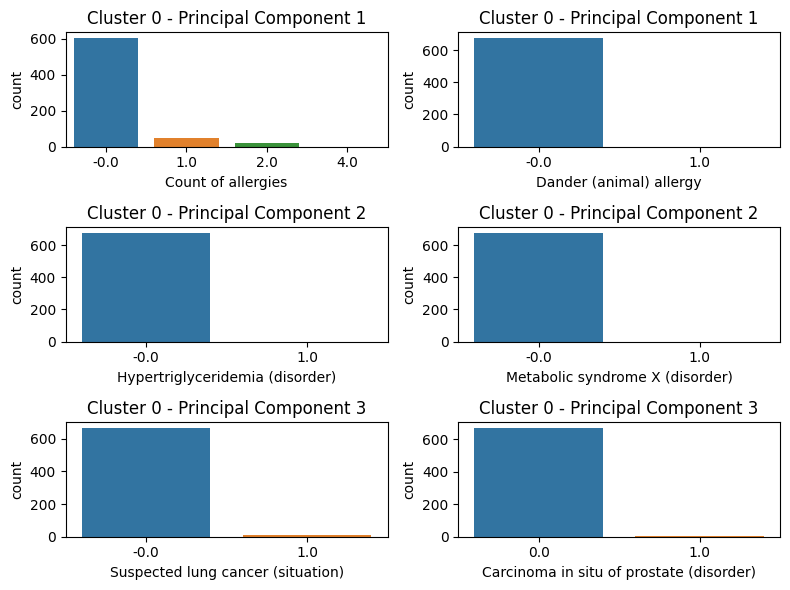

In [67]:
# get the prominent columns from pca interpretation 
plotdata_0 = extracted_data_0[['Count of allergies', 'Dander (animal) allergy', #PC1
                               'Hypertriglyceridemia (disorder)', 'Metabolic syndrome X (disorder)', #PC2
                               'Suspected lung cancer (situation)', 'Carcinoma in situ of prostate (disorder)' #PC3
                              ]].round(0)

# plot the column values    
fig = plt.figure(figsize=(8, 6), tight_layout=True)

ax_1 = fig.add_subplot(321)
ax_1.set_title('Cluster 0 - Principal Component 1')
sns.countplot(x ='Count of allergies', data = plotdata_0)

ax_2 = fig.add_subplot(322)
ax_2.set_title('Cluster 0 - Principal Component 1')
sns.countplot(x ='Dander (animal) allergy', data = plotdata_0)

ax_3 = fig.add_subplot(323)
ax_3.set_title('Cluster 0 - Principal Component 2')
sns.countplot(x ='Hypertriglyceridemia (disorder)', data = plotdata_0)

ax_4 = fig.add_subplot(324)
ax_4.set_title('Cluster 0 - Principal Component 2')
sns.countplot(x ='Metabolic syndrome X (disorder)', data = plotdata_0)

ax_5 = fig.add_subplot(325)
ax_5.set_title('Cluster 0 - Principal Component 3')
sns.countplot(x ='Suspected lung cancer (situation)', data = plotdata_0)

ax_6 = fig.add_subplot(326)
ax_6.set_title('Cluster 0 - Principal Component 3')
sns.countplot(x ='Carcinoma in situ of prostate (disorder)', data = plotdata_0);

---
> **Analysis for Cluster 0:**  
> Total patients: 677
> - Cluster 0 is made up of patients primarily with no allergies, and no patients were allergic to dander    
> - No patients in this cluster have Hypertriglyceridemia disorder or Metabolic syndrome X   
> - Patients in this cluster primarily have no report of suspected lung cancer or carcinoma in situ of prostate
---

#### 8.2. Cluster 1 Analysis

In [68]:
extracted_data_1 = scaler.inverse_transform(np.dot(ed_patients_pca_2, pca.components_))[np.where(ed_patient_pred_2==1)]
extracted_data_1 = pd.DataFrame(extracted_data_1, columns=ed_patients_df_2.columns)
print("Cluster 1 Rows:", extracted_data_1.shape[0])
extracted_data_1.head()

Cluster 1 Rows: 71


,Age_Category,Expense_Category,County_Category,Race_Category,Gender_Category,Acute allergic reaction,Acute bacterial sinusitis (disorder),Acute bronchitis (disorder),Acute viral pharyngitis (disorder),Alcoholism,...,Allergy to soya,Allergy to tree pollen,Allergy to wheat,Dander (animal) allergy,House dust mite allergy,Latex allergy,Shellfish allergy,Count of allergies,Allergy,Emergency_Encounters
0,6.903038,1.872394,7.487794,4.296391,0.728558,0.366083,-0.041821,0.384347,1.050997,-0.013285,...,0.160241,0.526906,0.204057,0.714479,0.557193,-0.057823,-0.082489,4.588498,0.728203,2.518150
1,3.993384,1.191016,14.186209,3.056299,0.543685,0.317681,0.107483,0.191473,0.142803,-0.059042,...,-0.121233,0.954368,0.704215,1.050177,0.893417,0.214153,0.729120,8.088009,1.128889,4.627879
2,2.602106,0.870342,8.482824,2.453615,1.585679,0.602164,0.123055,0.062801,1.181420,0.015122,...,-0.016304,0.562608,-0.068506,0.919645,0.764546,0.447638,0.946700,6.780163,1.524732,2.433087
3,0.816694,1.243144,9.928502,6.061649,1.676201,0.744594,0.043833,0.902682,0.487322,0.002470,...,0.635395,0.938311,0.476549,1.180466,0.802815,0.262810,0.200104,8.147720,1.321613,0.776909
4,1.701183,1.088358,2.990145,5.738567,1.063298,0.677216,0.689398,0.241031,1.154735,-0.011752,...,0.036432,0.616383,0.613723,0.945581,0.798025,0.726559,0.430373,6.869157,0.779573,2.191882


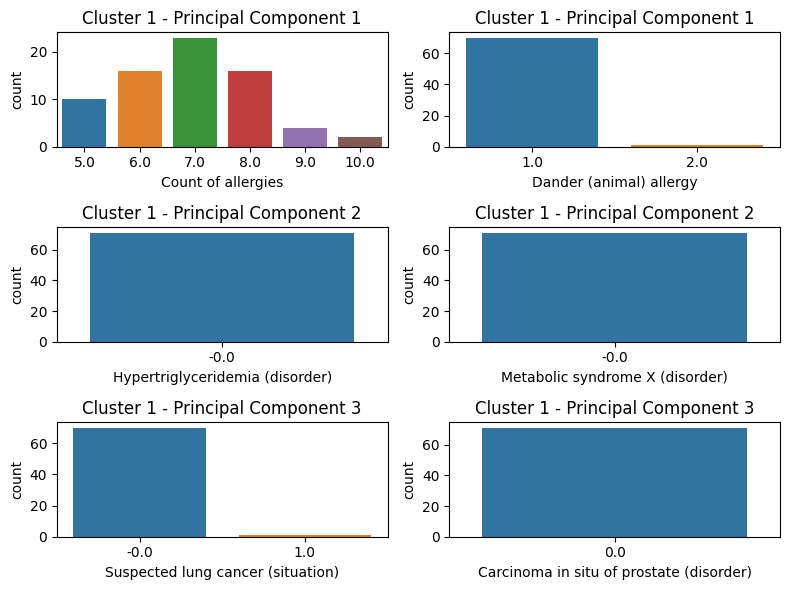

In [69]:
# get the prominent columns from pca interpretation 
plotdata_1 = extracted_data_1[['Count of allergies', 'Dander (animal) allergy', #PC1
                               'Hypertriglyceridemia (disorder)', 'Metabolic syndrome X (disorder)', #PC2
                               'Suspected lung cancer (situation)', 'Carcinoma in situ of prostate (disorder)' #PC3
                              ]].round(0)

# plot the column values    
fig = plt.figure(figsize=(8, 6), tight_layout=True)

ax_1 = fig.add_subplot(321)
ax_1.set_title('Cluster 1 - Principal Component 1')
sns.countplot(x ='Count of allergies', data = plotdata_1)

ax_2 = fig.add_subplot(322)
ax_2.set_title('Cluster 1 - Principal Component 1')
sns.countplot(x ='Dander (animal) allergy', data = plotdata_1)

ax_3 = fig.add_subplot(323)
ax_3.set_title('Cluster 1 - Principal Component 2')
sns.countplot(x ='Hypertriglyceridemia (disorder)', data = plotdata_1)

ax_4 = fig.add_subplot(324)
ax_4.set_title('Cluster 1 - Principal Component 2')
sns.countplot(x ='Metabolic syndrome X (disorder)', data = plotdata_1)

ax_5 = fig.add_subplot(325)
ax_5.set_title('Cluster 1 - Principal Component 3')
sns.countplot(x ='Suspected lung cancer (situation)', data = plotdata_1)

ax_6 = fig.add_subplot(326)
ax_6.set_title('Cluster 1 - Principal Component 3')
sns.countplot(x ='Carcinoma in situ of prostate (disorder)', data = plotdata_1);

---
> **Analysis for Cluster 1:**  
> Total patients: 71  
> - All patients Cluster 1 have at least five allergies   
> - No patients in this cluster have Hypertriglyceridemia disorder or Metabolic syndrome X   
> - Patients in this cluster primarily have no report of suspected lung cancer and no carcinoma in situ of prostate
---

#### 8.3. Cluster 2 Analysis

In [70]:
extracted_data_2 = scaler.inverse_transform(np.dot(ed_patients_pca_2, pca.components_))[np.where(ed_patient_pred_2==2)]
extracted_data_2 = pd.DataFrame(extracted_data_2, columns=ed_patients_df_2.columns)
print("Cluster 2 Rows:", extracted_data_2.shape[0])
extracted_data_2.head()

Cluster 2 Rows: 52


,Age_Category,Expense_Category,County_Category,Race_Category,Gender_Category,Acute allergic reaction,Acute bacterial sinusitis (disorder),Acute bronchitis (disorder),Acute viral pharyngitis (disorder),Alcoholism,...,Allergy to soya,Allergy to tree pollen,Allergy to wheat,Dander (animal) allergy,House dust mite allergy,Latex allergy,Shellfish allergy,Count of allergies,Allergy,Emergency_Encounters
0,6.413324,1.700294,7.445789,3.789072,1.488546,-0.019795,-0.019503,0.820293,0.160469,0.000665,...,0.014802,-0.026018,0.068125,-0.043836,-0.077824,0.057583,0.028301,0.081801,0.118519,1.792875
1,4.219056,1.274944,10.907636,4.993515,1.584522,-0.008130,0.001394,0.412698,1.141858,0.014495,...,0.013170,-0.003242,-0.031349,-0.027130,-0.039486,-0.012060,-0.109256,-0.190108,-0.065720,1.914947
2,4.422513,1.284448,8.934447,4.056376,1.712751,0.257082,0.040507,0.090016,0.519804,0.044837,...,0.057583,0.568857,0.190013,0.658878,0.607575,0.119338,0.094946,4.581504,0.639111,2.763152
3,6.093245,1.677994,8.693060,5.938207,1.616426,0.239862,-0.019446,0.178289,0.794436,-0.026618,...,-0.098135,0.678675,0.296175,0.725179,0.613907,0.024446,0.259853,5.881444,0.870131,2.545901
4,5.983140,1.510719,4.281995,5.908866,0.844785,0.018374,0.044779,0.558880,0.473222,-0.030778,...,-0.013540,-0.015380,0.027561,-0.028774,-0.044591,-0.031131,-0.038277,0.010368,0.017924,2.043437


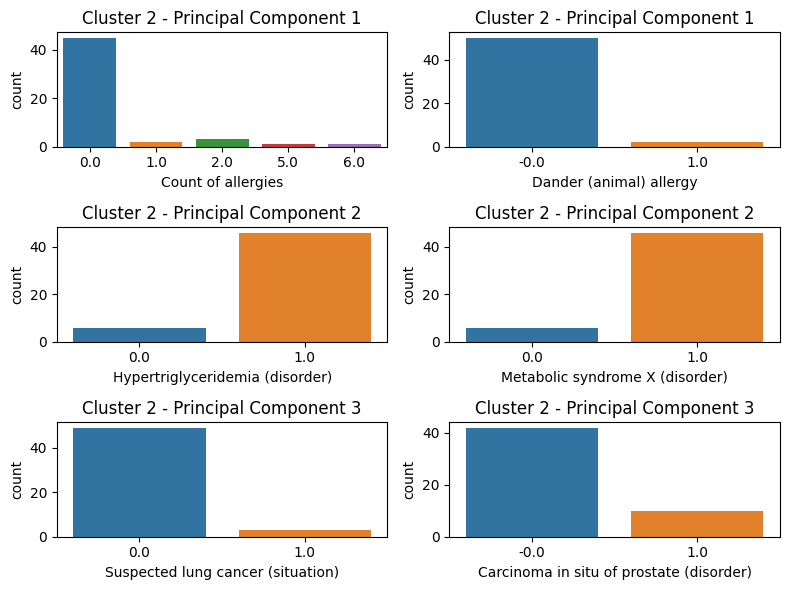

In [71]:
# get the prominent columns from pca interpretation 
plotdata_2 = extracted_data_2[['Count of allergies', 'Dander (animal) allergy', #PC1
                               'Hypertriglyceridemia (disorder)', 'Metabolic syndrome X (disorder)', #PC2
                               'Suspected lung cancer (situation)', 'Carcinoma in situ of prostate (disorder)' #PC3
                              ]].round(0)

# plot the column values    
fig = plt.figure(figsize=(8, 6), tight_layout=True)

ax_1 = fig.add_subplot(321)
ax_1.set_title('Cluster 2 - Principal Component 1')
sns.countplot(x ='Count of allergies', data = plotdata_2)

ax_2 = fig.add_subplot(322)
ax_2.set_title('Cluster 2 - Principal Component 1')
sns.countplot(x ='Dander (animal) allergy', data = plotdata_2)

ax_3 = fig.add_subplot(323)
ax_3.set_title('Cluster 2 - Principal Component 2')
sns.countplot(x ='Hypertriglyceridemia (disorder)', data = plotdata_2)

ax_4 = fig.add_subplot(324)
ax_4.set_title('Cluster 2 - Principal Component 2')
sns.countplot(x ='Metabolic syndrome X (disorder)', data = plotdata_2)

ax_5 = fig.add_subplot(325)
ax_5.set_title('Cluster 2 - Principal Component 3')
sns.countplot(x ='Suspected lung cancer (situation)', data = plotdata_2)

ax_6 = fig.add_subplot(326)
ax_6.set_title('Cluster 2 - Principal Component 3')
sns.countplot(x ='Carcinoma in situ of prostate (disorder)', data = plotdata_2);

---
> **Analysis for Cluster 2:**  
> Total patients: 52
> - Most patients in Cluster 2 have no allergies    
> - A majority of patients in this cluster do have Hypertriglyceridemia disorder or Metabolic syndrome X   
> - A small number of patients in this cluster have suspected lung cancer or carcinoma in situ of prostate  
---

### 9. Conclusions, Limitations & Future Work

#### 9.1. Conclusions

The largest cluster was Cluster 0 with 677 patients, followed by Cluster 1 with 71 patients and Cluster 2 with 52.

As shown in the bar charts above, the following prominant columns were identified for each cluster:
- Cluster 0 is driven by lack of or minimal presence of allergies, Hypertriglyceridemia disorder, Metabolic syndrome X, Suspected lung cancer or Carcinoma in situ of prostate.  
- Cluster 1 is driven by presence of allergies.  
- Cluster 2 is driven by presence of Hypertriglyceridemia disorder or Metabolic syndrome X.



#### 9.2. Limitations  

A limitation of the model and analysis was the dataset. Given that the data was synthetic, it may not truly represent patterns in patients who have emergency encounters. Additionally, it is unknown if the 2020 and 2021 datasets were comprised of the same patients or a different group of patients.  

#### 9.3. Future Work

An area for future work to improve the model is to develop condition groupers where each condition is assigned to a category made up of other similar conditions. The assumption is that this method would create more, smaller clusters, which would be made up of patients that share more-similar characteristics than the current method where each condition is treated separately.